# Análise Exploratória dos Dados

In [ ]:
! pip install fancyimpute
! pip install scikit-learn==0.24.1
! pip install sklearn_crfsuite
! pip install gensim
! pip install scikit-multilearn==0.20

In [246]:
import pandas as pd

file_path = 'desafio_indicium_imdb.csv'

global data
try:
    data = pd.read_csv(file_path, delimiter=',', encoding='UTF-8', index_col=0)
    display(data.head(3))
except FileNotFoundError:
    print(f"Erro: O arquivo '{file_path}' não foi encontrado.")
except pd.errors.EmptyDataError:
    print(f"Erro: O arquivo '{file_path}' está vazio.")
except pd.errors.ParserError:
    print(f"Erro: Ocorreu um erro ao analisar o arquivo '{file_path}'. Verifique a formatação.")
except Exception as e:
    print(f"Erro: Ocorreu um erro inesperado ao ler o arquivo '{file_path}'. Detalhes: {e}")


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"


## Visualizações Iniciais e Pré-processamento dos dados

Nessa parte é descrito o processo inicial da análise exploratória, como foi desenvolvidas as etapas que vizam o melhor uso dos dados e a compreenção de como eles estava dispostos, para que a partir daí fossem escolhidos algoritmos com melhores históricos para liar com esses dados.


Foram tratados os nulos, analizado alguns outliers e visto qual a melhor forma de lidar com eles também.Por fim, houve um pré-processamento e vetorização dos dados textuais disponíveis na coluna _Overview_ para uso porterior no algoritmo de calssificação.

### Tamanho e Informações dos Dados

Com a informação sobre o tamanho dos dados, é possível identificar quais algoritmos de Machine Learning seriam mais adequados para o conjunto total. Nesse caso, algoritmos que lidam bem com pequenos volumes de dados seriam mais apropriados. Estes algoritmos não apenas são mais rápidos, o que é otimo para lidar com conjuntos menores de dados, mas também tendem a ser mais eficazes na exploração e na extração de padrões sutis nos dados disponíveis.

Além da velocidade, a escolha de algoritmos que se adaptam bem a pequenos conjuntos de dados pode resultar em modelos mais precisos e menos propensos ao overfitting, especialmente em cenários onde a quantidade de dados é limitada. Algoritmos como k-Nearest Neighbors (k-NN), Support Vector Machines (SVM) com kernels lineares, e alguns modelos de árvores de decisão podem ser preferíveis, uma vez que geralmente não requerem grandes volumes de dados para treinamento robusto.

In [247]:
if 'data' in globals():
    print(f"O DataFrame possui {data.shape[0]} linhas e {data.shape[1]} colunas.")
else:
    print("Erro: O DataFrame 'data' não foi carregado corretamente.")

O DataFrame possui 999 linhas e 15 colunas.


Com as informações gerais abaixo, é possível verificar se as features dos dados foram extraídas corretamente e se seus tipos correspondem ao esperado. Também é possível averiguar a quantidade de colunas e valores não nulos. Ao analisar os resultados obtidos, nota-se que algumas colunas apresentam tipos de dados que se forem convertidos podem ser melhor utilizados no estudo de caso.

In [248]:
if 'data' in globals():
    data.info()
else:
    print("Erro: O DataFrame 'data' não foi carregado corretamente.")

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 124.9+ KB


### Tratamento dos dados com tipagem distorcida

Algumas colunas encontradas deveriam ser tratadas como numéricas e não o foram, como Gross, Released_Year e Runtime. Estas podem ser necessárias para as demais atividades desenvolvidas neste estudo, portanto faremos a transformação adequada.

Na coluna Released_Year, identificamos um outlier no índice 966 do dataset, que não condiz com os valores esperados para essa coluna. Para resolver este problema, pesquisamos o nome do filme e descobrimos o ano correto de seu lançamento, que foi imputado no dado. Devido a ser apenas um valor discrepante e os demais dados da coluna estarem de acordo com o padrão esperado, optamos por não eliminar a linha inteira. Para futuras análises, caso surjam mais valores discrepantes, recomendamos o tratamento desses dados por um especialista para manter a integridade do estudo. Em casos em que muitos valores estão fora do padrão, seria ideal não incluí-los no estudo.

In [285]:
import pandas as pd

def clean_column(value):
    global REPLECED 
    if isinstance(value, str):
        if value == 'PG':
            return 1970
        return int(value.replace(REPLECED, ''))
    return value

columns = {'Released_Year': '', 'Runtime': ' min', 'Gross': ','}

for column, repl in columns.items():
    REPLECED = repl 
    data[column] = data[column].apply(clean_column)
data.head(3)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
1,The Godfather,1972,A,175,"Crime, Drama",9.2,organize crime dynasty age patriarch transfer ...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,menace know joker wreaks havoc chaos people go...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,early life career vito corleone new york city ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0


A coluna Certificate mostra que as classificações etárias não estão padronizadas tendo mais de um exemplo para a mesma classificação. Por isso, é necessário padronizar esses valoes para caso seja utilizado no futuro.

In [286]:
if 'data' in globals():
    data_certificate = data['Certificate'].unique()
    print(data_certificate)
else:
    print("Erro: O DataFrame 'data' não foi carregado corretamente.")

['A' 'UA' 'U' 'PG-13' 'R' nan 'PG' 'G' 'Passed' 'TV-14' '16' 'TV-MA'
 'Unrated' 'GP' 'Approved' 'TV-PG' 'U/A']


In [287]:
import pandas as pd

def group_by_esrb_ratings(df):
    esrb_rating_mapping = {
        'E': 'E',
        'E10+': 'E10+',
        'T': 'T',
        'M': 'M',
        'AO': 'AO',
        'A': 'AO',
        'UA': 'T',
        'U': 'E',
        'PG-13': 'T',
        'R': 'M',
        'PG': 'E10+',
        'G': 'E',
        'Passed': 'E',
        'TV-14': 'T',
        '16': 'M',
        'TV-MA': 'AO',
        'Unrated': 'AO',
        'GP': 'E',
        'Approved': 'E',
        'TV-PG': 'E10+',
        'U/A': 'T'
    }

    df['Certificate'] = df['Certificate'].map(esrb_rating_mapping)
    
    return df

if 'data' in globals():
    data = group_by_esrb_ratings(data)
    data_certificate = data['Certificate'].unique()
    print(data_certificate)
else:
    print("Erro: O DataFrame 'data' não foi carregado corretamente.")

['AO' 'T' 'E' 'M' nan 'E10+']


A coluna Genre demostra que a maioria dos filmes possui mais de uma categoria. Portanto, é ideal que essa coluna seja transformada em uma lista de categorias para facilitar seu uso durante a classificação dos filmes de acordo com a feature _Overview_

In [288]:
import pandas as pd

def convert_column_to_list(df, column_name):
    def convert_to_list(s):
        if isinstance(s, str):
            return [item.strip() for item in s.split(',')]
        elif isinstance(s, list):
            return s
        return []
    df[column_name] = df[column_name].apply(convert_to_list)
    
    return df

data = convert_column_to_list(data, 'Genre')


### Tratamento de Outliers

Analisar os Outliers é essencial para fazer qualquer tratamento nos dados e também escolher os algortimos que performam melhor com esse tipo de dado, o gráfico de _boxplot_ é uma otima forma de identificar essas variações e o comportamento dos dados

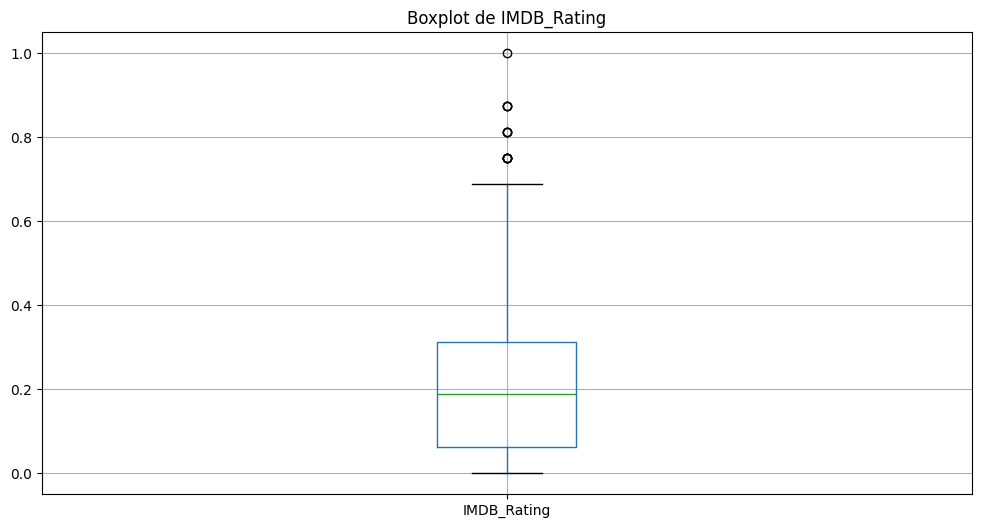

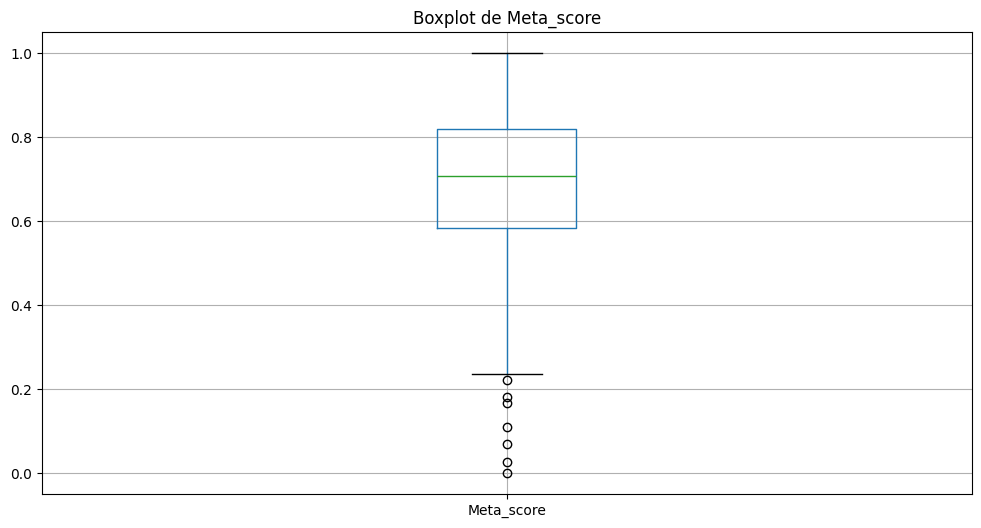

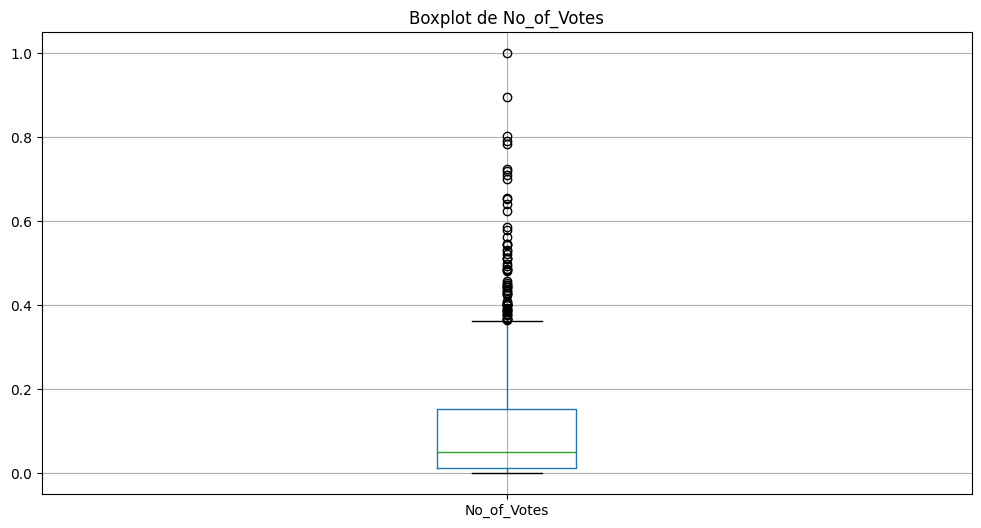

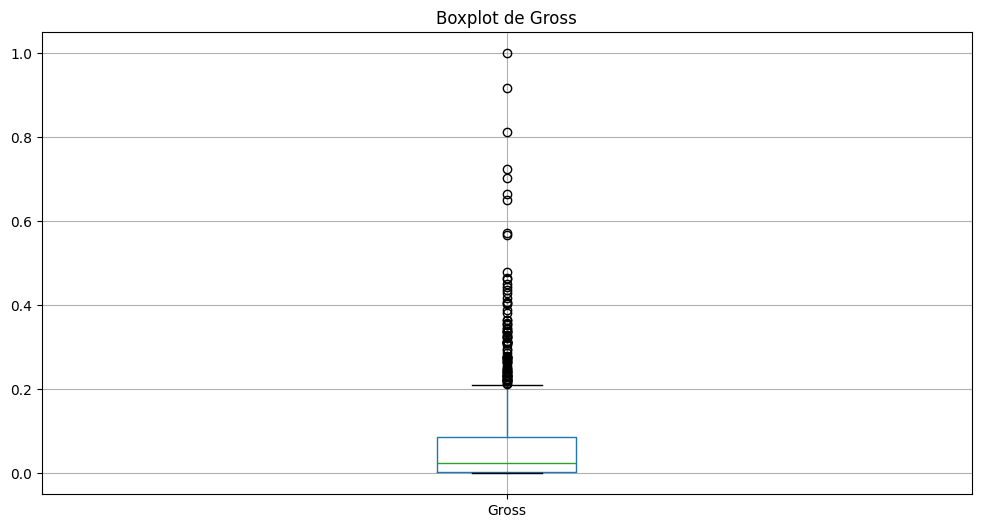

In [260]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

if 'data' in globals():
    data_outliers = data.drop(columns=['Released_Year', 'Runtime'])
    numeric_cols = data_outliers.select_dtypes(include=[np.number]).columns

    scaler = MinMaxScaler()
    data_outliers[numeric_cols] = scaler.fit_transform(data_outliers[numeric_cols])

    for col in numeric_cols:
        plt.figure(figsize=(12, 6))
        data_outliers.boxplot([col])
        plt.title(f'Boxplot de {col}')
        plt.show()
else:
    print("Erro: O DataFrame 'data' não foi carregado corretamente.")


Sobre os gráficos é possível inferir que:

* IMDB_Rating: Para esta característica, os outliers não precisam necessariamente ser descartados ou tratados. Esses valores extremos representam filmes que, por algum motivo, receberam altas avaliações críticas e podem fornecer insights valiosos durante o estudo das características que levam ao aumento de faturamento. Por isso, a decisão foi mantê-los.

* Meta_score: A variabilidade, observada através dos bigodes do boxplot, está alta, indicando que os dados estão bem dispersos por todo o intervalo de informação. Além disso, o IQR está deslocado para cima, sugerindo uma tendência dos dados para valores mais altos dentro do intervalo. Assim, esses fatores podem ter destacado valores muito baixos como outliers, mas decidimos mantê-los para analisar seu impacto no faturamento.

* No_of_Votes: A mediana está próxima de 0, indicando que a maioria dos votos está concentrada em valores baixos. A caixa é relativamente pequena, sugerindo baixa variabilidade na maioria dos dados. No entanto, os bigodes são longos, indicando uma ampla gama de valores. A caixa está deslocada para baixo, sugerindo que os dados são positivamente assimétricos, com uma cauda longa para valores altos. Isso pode indicar que os outliers estão relacionados a altos faturamentos. Como essa informação é relevante para o estudo, os valores serão mantidos inalterados.

* Gross: Os dados dessa característica são positivamente assimétricos, com um IQR pequeno, indicando baixa variabilidade. A presença de outliers sugere uma distribuição com cauda longa ou a ocorrência de eventos raros onde alguns filmes faturaram significativamente mais do que o comum. Esse comportamento é esperado, considerando os inúmeros sucessos de bilheteria. Portanto, os dados de grande faturamento serão mantidos no estudo sem alterações.

### Tratamento de Nulos

Ao conferir a quantidade de nulos de uma coluna é possivel identiicar que as colunas de Certificate, Meta_score e Gross possuem muitos valores nulos que podem comprometer etapas futuras do estudo.

In [261]:
if 'data' in globals():
    null_counts = data.isnull().sum()
    print("Valores nulos por coluna:")
    print(null_counts)
else:
    print("Erro: O DataFrame 'data' não foi carregado corretamente.")


Valores nulos por coluna:
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


#### Tratamento pela remoção

A primeira alternativa de solução seria apagar os valores faltantes. Nesse caso, seriam mantidos aproximadamente 71.4% dos dados, porém é uma abordagem arriscada, visto que o conjunto já é pequeno e os _outliers_ ainda não foram analisados. Assim, a abosdagem poderia comprometer a robustez do modelo, pois a perda de dados significativos pode afetar a capacidade de generalização para novos dados. 

Portanto, vamos considerar outra abordagem, como a imputação de dados, e no desenvolvimento do estudo, compararar a exclusão de nulos. Assim, será possível analisar se a remoção desses valores nulos não teve um grande impacto na classificação ou se obtemos uma solução melhor com a imputação de dados.

In [262]:
if 'data' in globals():
    data_dropna = data.copy()
    
    data_dropna.dropna(inplace=True)
    print("Novo shape do DataFrame após remover valores nulos:", data_dropna.shape)
else:
    print("Erro: O DataFrame 'data' não foi carregado corretamente.")


Novo shape do DataFrame após remover valores nulos: (713, 15)


#### Tratamento pela Imputação

Antes de preencher os dados, é fundamental compreender a importância dessas características para o objetivo e como neutralizar os valores faltantes de maneira que não afetem os resultados.

Existem abordagens avançadas utilizando machine learning para prever os valores mais adequados para preenchimento dos dados faltantes. Essas técnicas são especialmente úteis quando o benefício obtido supera o esforço necessário. Por exemplo, quando a coluna com dados faltantes possui alta correlação com outras variáveis e o uso de machine learning permite substituí-los de forma a preservar a distribuição original dos dados. Além disso, é crucial considerar os recursos de tempo de processamento disponíveis para garantir que essa operação não comprometa o desempenho dos algoritmos principais.

Um estudo adicional foi conduzido para determinar a melhor abordagem de imputação utilizando três algoritmos distintos:

- **Média/Mediana/Moda:** Métodos simples e rápidos de implementar, úteis quando os dados estão normalmente distribuídos. No entanto, eles não levam em conta as correlações entre as características. A média pode ser sensível a outliers, como da feature Gross, sendo a mediana ou a moda opções mais adequadas nesse caso.

- **Imputação por K-Nearest Neighbors (KNN):** Ideal quando os dados não seguem uma distribuição normal ou apresentam uma estrutura não linear. Este método considera as correlações entre as características e geralmente não é computacionalmente intensivo para conjuntos de dados pequenos.

- **Imputação por MICE (Multiple Imputation by Chained Equations):** Indicado quando os dados faltantes estão ausentes de maneira completamente aleatória ou aleatória condicional. Ele gera múltiplas imputações, refletindo a incerteza em torno dos valores ausentes.

##### Média, Moda e Mediana

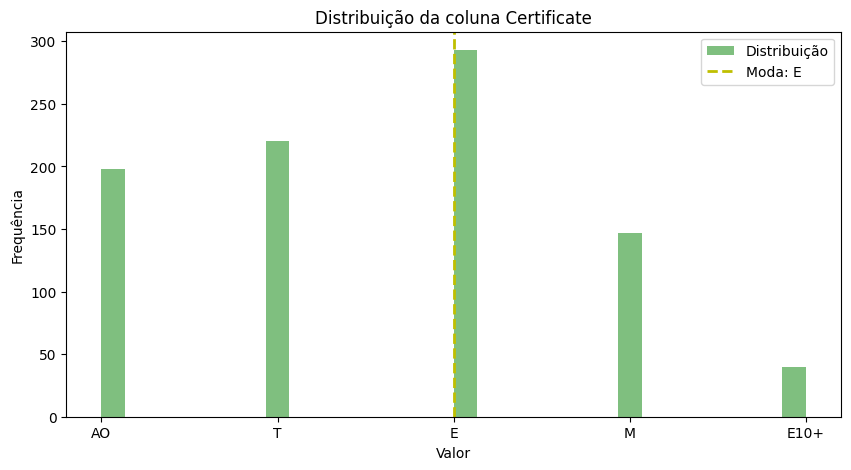

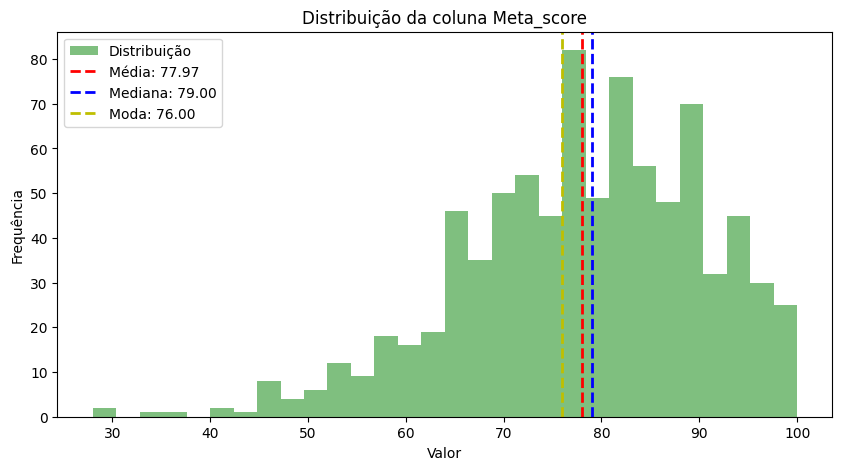

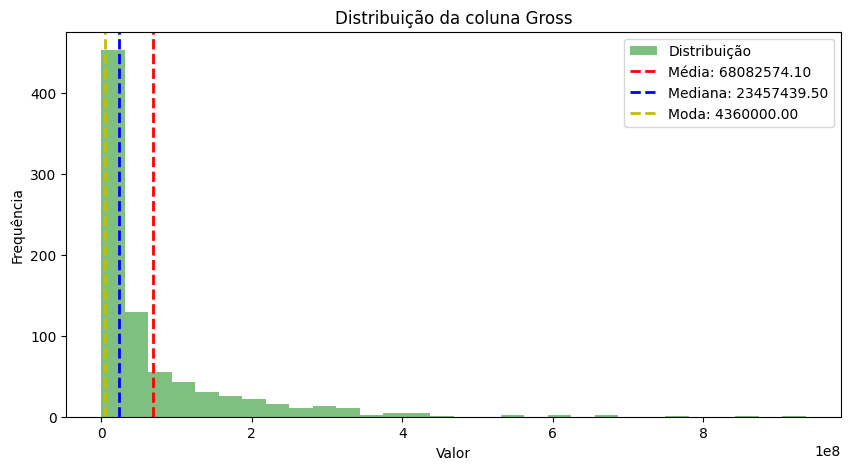

In [263]:
import matplotlib.pyplot as plt

columns = ['Certificate', 'Meta_score', 'Gross']

for col in columns:
    plt.figure(figsize=(10, 5))
    plt.hist(data[col].dropna(), bins=30, alpha=0.5, color='g', label='Distribuição')

    if col != 'Certificate':
        media = data[col].mean()
        plt.axvline(media, color='r', linestyle='dashed', linewidth=2, label=f'Média: {media:.2f}')

        mediana = data[col].median()
        plt.axvline(mediana, color='b', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana:.2f}')

    moda = data[col].mode().get(0, None)
    if moda is not None:
        if col != 'Certificate':
            plt.axvline(moda, color='y', linestyle='dashed', linewidth=2, label=f'Moda: {moda:.2f}')
        else:
            plt.axvline(moda, color='y', linestyle='dashed', linewidth=2, label=f'Moda: {moda}')

    plt.title(f'Distribuição da coluna {col}')
    plt.xlabel('Valor')
    plt.ylabel('Frequência')
    plt.legend()
    plt.show()

Dados os gráficos de distribução é possível aferir sobre as variaveis:

* Certificate: A distribuição da coluna mostra que a categoria ‘E’ é a mais frequente. Para variáveis categóricas, a imputação pela moda é geralmente a melhor opção, pois mantém a consistência dos dados.

* Meta_score: A distribuição parece ser relativamente simétrica, com a média, mediana e moda próximas umas das outras. Isso sugere que a imputação pela mediana pode ser uma boa opção, pois é menos sensível a outliers.

* Gross: A distribuição da coluna Gross parece ser assimétrica, com a média significativamente maior que a mediana e a moda. Além disso, essa coluna está diretamente relacionada a um dos principais objetivos do estudo: analisar a relação das características com o faturamento dos filmes. Portanto, vamos estudar a correlação dessa feature com as demais do dataset. Se houverem grandes correlações, isso não apenas atingirá um dos objetivos do estudo, mas também possibilitará o preenchimento dos valores faltantes dessa coluna com algoritmos mais sofisticados.

##### Imputação

In [264]:
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

data_imputed = data.copy()

mask_certificate = data_imputed['Certificate'].isnull()
mask_gross = data_imputed['Gross'].isnull()
mask_meta_score = data_imputed['Meta_score'].isnull()

# Imputação usando SimpleImputer (most_frequent) para 'Certificate'
most_frequent_imputer = SimpleImputer(strategy='most_frequent')
data_imputed['Certificate_most_frequent'] = data_imputed['Certificate'].copy()
data_imputed.loc[mask_certificate, 'Certificate_most_frequent'] = most_frequent_imputer.fit_transform(data_imputed[['Certificate']])[mask_certificate]

# Imputação usando SimpleImputer (median) para 'Gross' e 'Meta_score'
median_imputer = SimpleImputer(strategy='median')
data_imputed['Gross_median'] = data_imputed['Gross'].copy()
data_imputed.loc[mask_gross, 'Gross_median'] = median_imputer.fit_transform(data_imputed[['Gross']])[mask_gross]

data_imputed['Meta_score_median'] = data_imputed['Meta_score'].copy()
data_imputed.loc[mask_meta_score, 'Meta_score_median'] = median_imputer.fit_transform(data_imputed[['Meta_score']])[mask_meta_score]

# Imputação usando KNNImputer para 'Gross'
knn_imputer = KNNImputer(n_neighbors=5)
data_imputed['Gross_knn'] = data_imputed['Gross'].copy()
data_imputed.loc[mask_gross, 'Gross_knn'] = knn_imputer.fit_transform(data_imputed[['Gross']])[mask_gross]

# Imputação usando IterativeImputer para 'Gross'
mice_imputer = IterativeImputer()
data_imputed['Gross_mice'] = data_imputed['Gross'].copy()
data_imputed.loc[mask_gross, 'Gross_mice'] = mice_imputer.fit_transform(data_imputed[['Gross']])[mask_gross]

Avaliar a qualidade da imputação é um passo importante para garantir que a imputação não introduziu viés ou distorção nos seus dados. É possível observar essas alterações através da  **Visualização de Dados** após a imputação.

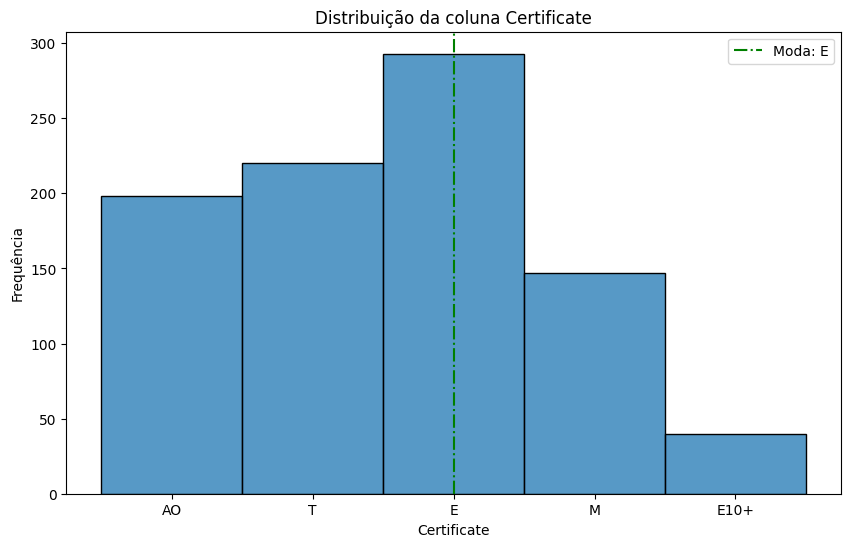

--- Estatísticas de Certificate ---
Moda: E


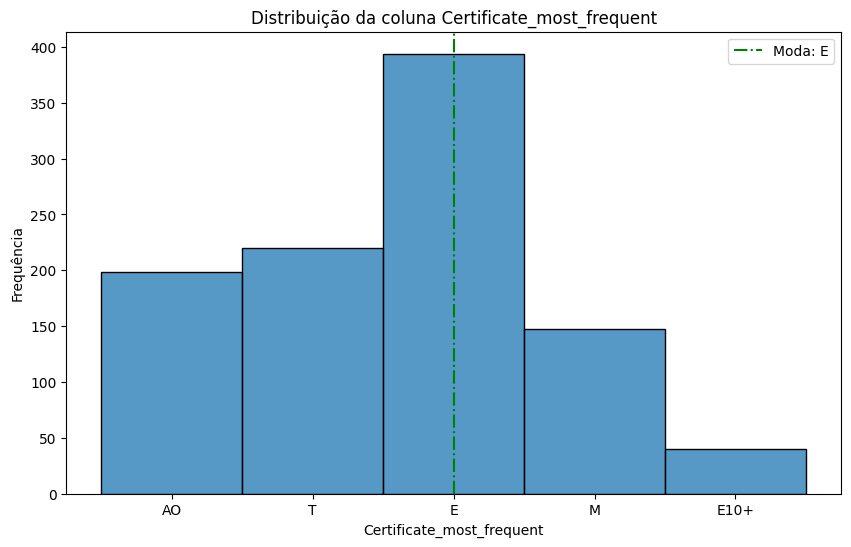

--- Estatísticas de Certificate_most_frequent ---
Moda: E


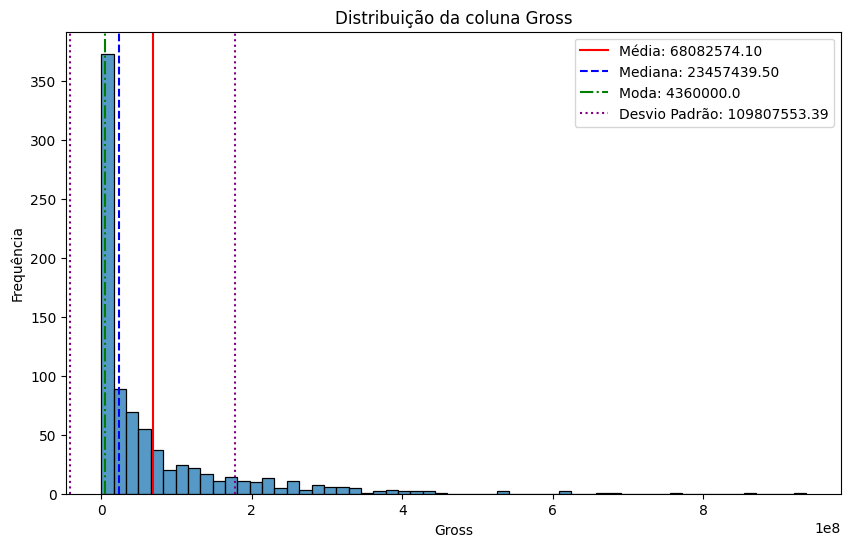

--- Estatísticas de Gross ---
Média: 68082574.10
Mediana: 23457439.50
Moda: 4360000.0
Desvio Padrão: 109807553.39
Variância: 12057698780558386.00


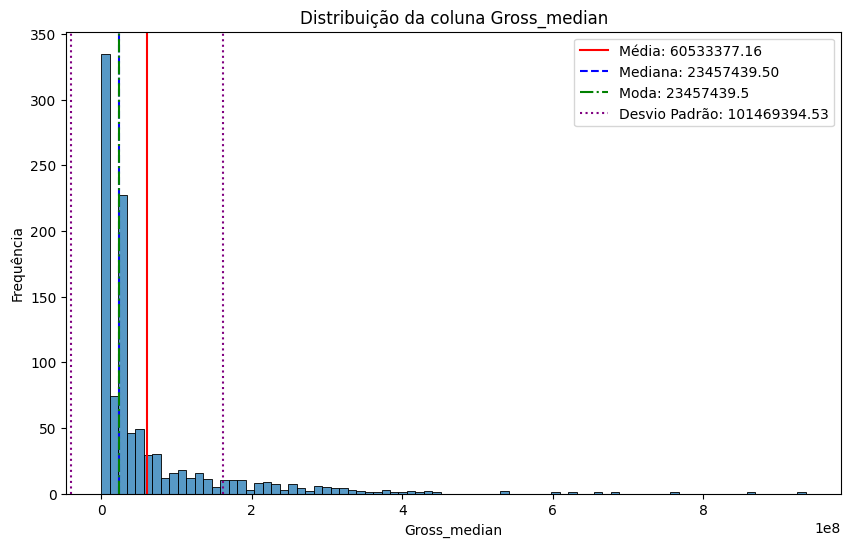

--- Estatísticas de Gross_median ---
Média: 60533377.16
Mediana: 23457439.50
Moda: 23457439.5
Desvio Padrão: 101469394.53
Variância: 10296038026900616.00


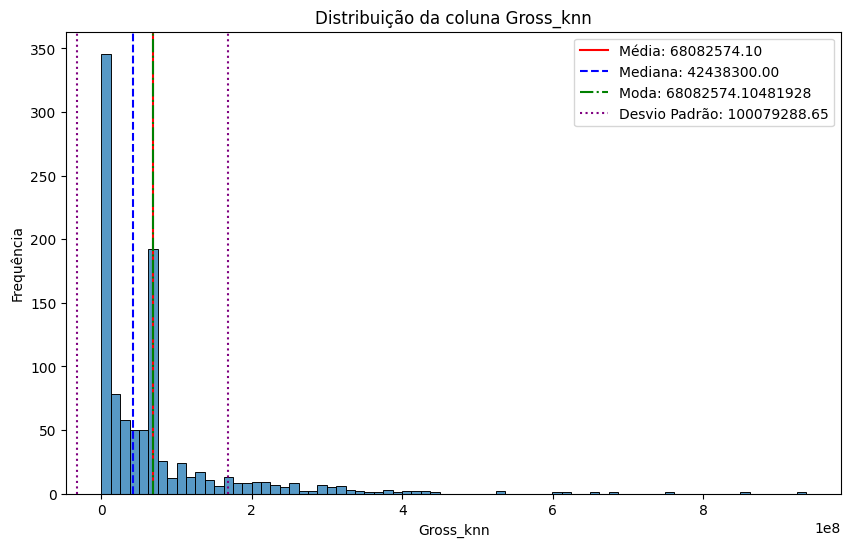

--- Estatísticas de Gross_knn ---
Média: 68082574.10
Mediana: 42438300.00
Moda: 68082574.10481928
Desvio Padrão: 100079288.65
Variância: 10015864017117136.00


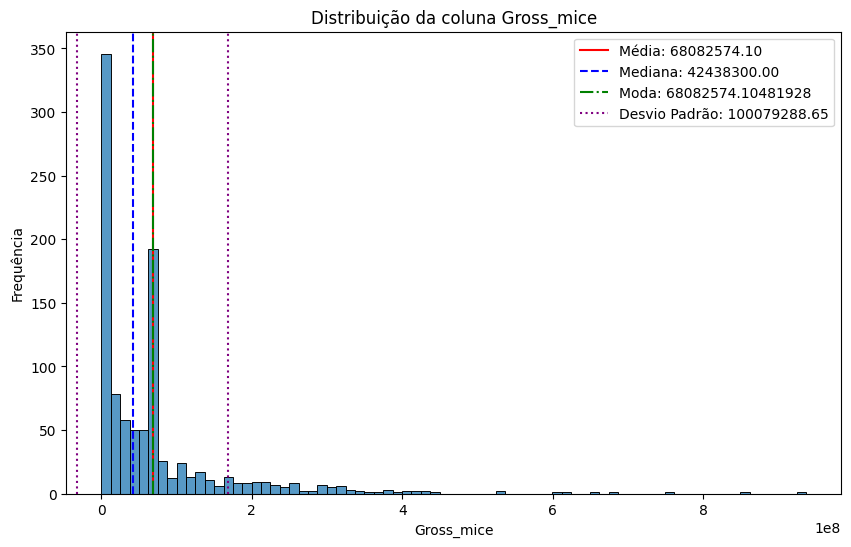

--- Estatísticas de Gross_mice ---
Média: 68082574.10
Mediana: 42438300.00
Moda: 68082574.10481928
Desvio Padrão: 100079288.65
Variância: 10015864017117136.00


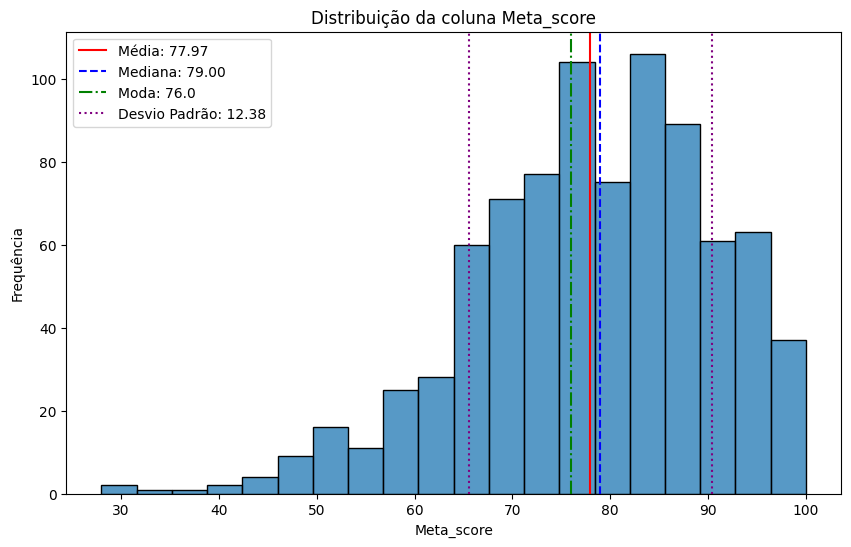

--- Estatísticas de Meta_score ---
Média: 77.97
Mediana: 79.00
Moda: 76.0
Desvio Padrão: 12.38
Variância: 153.35


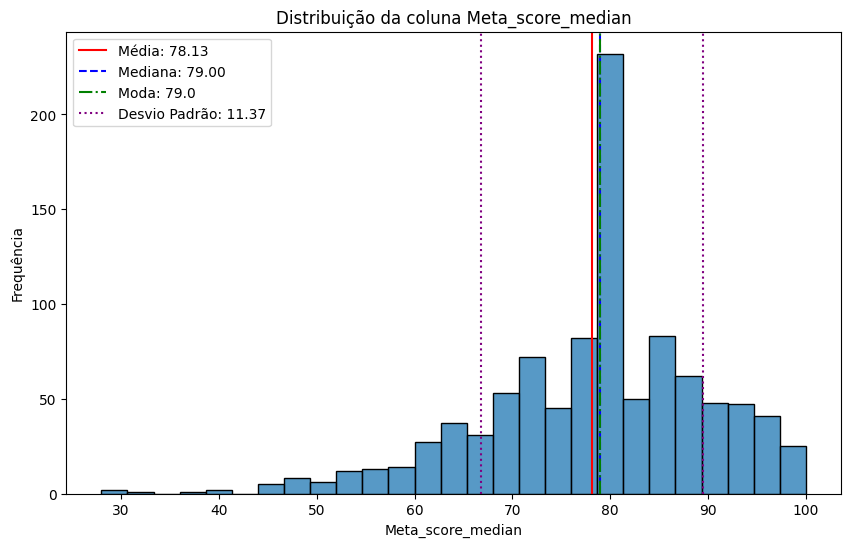

--- Estatísticas de Meta_score_median ---
Média: 78.13
Mediana: 79.00
Moda: 79.0
Desvio Padrão: 11.37
Variância: 129.36


In [265]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution_and_stats(column_name, data):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column_name], kde=False)
    
    mean_val = data[column_name].mean() if data[column_name].dtype != 'object' else None
    median_val = data[column_name].median() if data[column_name].dtype != 'object' else None
    mode_val = data[column_name].mode()[0]
    std_dev = data[column_name].std() if data[column_name].dtype != 'object' else None
    variance = data[column_name].var() if data[column_name].dtype != 'object' else None
    
    if mean_val is not None:
        plt.axvline(mean_val, color='red', linestyle='-', label=f'Média: {mean_val:.2f}')
    if median_val is not None:
        plt.axvline(median_val, color='blue', linestyle='--', label=f'Mediana: {median_val:.2f}')
    plt.axvline(mode_val, color='green', linestyle='-.', label=f'Moda: {mode_val}')
    if std_dev is not None:
        plt.axvline(mean_val + std_dev, color='purple', linestyle=':', label=f'Desvio Padrão: {std_dev:.2f}')
        plt.axvline(mean_val - std_dev, color='purple', linestyle=':')
    
    plt.legend()
    
    plt.title(f'Distribuição da coluna {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequência')
    plt.show()
    
    print(f"--- Estatísticas de {column_name} ---")
    if mean_val is not None:
        print(f"Média: {mean_val:.2f}")
    if median_val is not None:
        print(f"Mediana: {median_val:.2f}")
    print(f"Moda: {mode_val}")
    if std_dev is not None:
        print(f"Desvio Padrão: {std_dev:.2f}")
    if variance is not None:
        print(f"Variância: {variance:.2f}")

columns_to_plot = ['Certificate', 'Certificate_most_frequent', 'Gross', 'Gross_median', 'Gross_knn', 'Gross_mice', 'Meta_score', 'Meta_score_median']
for col in columns_to_plot:
    plot_distribution_and_stats(col, data_imputed)


* Meta_score: A substituição dos valores nulos pela mediana parece ter sido uma boa escolha neste caso. A média e a mediana permaneceram praticamente as mesmas, o que indica que a tendência central dos dados não foi significativamente alterada. Além disso, o desvio padrão diminuiu, o que significa que os dados estão menos dispersos em relação à média.

* Certificate: Comparando com a distribuição inicial, a transformação com a moda manteve a categoria mais frequente e aumentou a frequência total, o que pode indicar uma maior consistência nos dados. Parece que a transformação foi eficaz.

* Gross: A mediana modificou bastante a distribuição.O KNN pode ser sensível a outliers, pois eles podem distorcer a noção de "proximidade". O MICE, por outro lado, pode ser mais robusto a outliers, pois usa um modelo baseado em equações para a imputação. O MICE ainda obteve o menor desvio padrão e por isso foi utilizado.

In [266]:
data_imputed['Certificate'] = data_imputed['Certificate_most_frequent']
data_imputed['Meta_score'] = data_imputed['Meta_score_median']
data_imputed['Gross'] = data_imputed['Gross_mice']

data_imputed = data_imputed.drop(columns=['Certificate_most_frequent', 'Meta_score_median', 'Gross_median', 'Gross_knn', 'Gross_mice'])
data_imputed.head(3)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
1,The Godfather,1972,AO,175,"[Crime, Drama]",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,T,152,"[Action, Crime, Drama]",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,AO,202,"[Crime, Drama]",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0


### Pré-processamento e Vetorização Textual

A feature Overview possui dados textuais que serão utilizados adiante em um problema de classificação, e por isso deve ser feito um processo de pré-porcessamento e vetorização antes de utilizar esses dados.

In [279]:
from concurrent.futures import ProcessPoolExecutor, as_completed
import logging
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Downloads necessários do NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('taggers/averaged_perceptron_tagger')
except LookupError:
    nltk.download('averaged_perceptron_tagger')

STOP_WORDS = set(stopwords.words('english'))

# Adicione quaisquer palavras genéricas adicionais que você deseja remover
STOP_WORDS.update(['man', 'young', 'most', 'one', 'set', 'try', 'must', 'go'])

# Constantes
OUTPUT_FILE = 'preprocessed_desafio_indicium_imdb.csv'
COLUMN_TEXT = 'Overview'
N_PROCS = 4

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def clean_and_lemmatize_text(text):
    if not isinstance(text, str):
        return ""
    
    lemmatizer = WordNetLemmatizer()
    
    # Remoção de padrões específicos
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'\d{2}/\d{2}/\d{4}', '', text)  # datas
    text = re.sub(r'\d+', '', text)  # nums
    text = re.sub(r'http\S+', '', text)  # links
    
    # Remoção de pontuação
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Conversão para minúsculas e lematização
    tokens = text.lower().split()
    tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens if word not in STOP_WORDS]
    text = ' '.join(tokens)
    
    return text


def clean_and_lemmatize_text_parallel(texts, num_workers=4):
    results = []
    with ProcessPoolExecutor(max_workers=num_workers) as executor:
        futures = {executor.submit(clean_and_lemmatize_text, text): text for text in texts}
        for future in as_completed(futures):
            text = futures[future]
            try:
                result = future.result()
                results.append(result)
            except Exception as e:
                logging.error(f'Error processing text "{text}": {e}')
                results.append(None)  # Ou qualquer valor padrão que você queira usar para falhas
    return results

def clean_and_lemmatize_texts(texts):
    results = []
    for text in texts:
        try:
            result = clean_and_lemmatize_text(text)
            results.append(result)
        except Exception as e:
            logging.error(f'Error processing text "{text}": {e}')
            results.append(None)  # Ou qualquer valor padrão que você queira usar para falhas
    return results

def main(data):
    data[COLUMN_TEXT] = clean_and_lemmatize_texts(data[COLUMN_TEXT])

    # Salvando o DataFrame processado
    data.to_csv(OUTPUT_FILE, index=False)
    print("Done preprocessing!")
    return data

if __name__ == "__main__":
    data = main(data)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lcad200/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/lcad200/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/lcad200/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Done preprocessing!
menace know joker wreaks havoc chaos people gotham batman accept great psychological physical test ability fight injustice


vetorização com o uso do TF-IDF

In [274]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

DEFAULT_COLUMN_TEXT = 'Overview'

def vectorize_count(df, column):
    df[column] = df[column].fillna("")
    
    if column in df.columns:
        vectorizer = TfidfVectorizer()
        count_matrix = vectorizer.fit_transform(df[column])
        return count_matrix
    else:
        raise ValueError(f"A coluna {column} não está presente no DataFrame.")

def main(data):
    overview = vectorize_count(data, DEFAULT_COLUMN_TEXT)
    return overview

if __name__ == "__main__":
    data = pd.read_csv('desafio_indicium_imdb.csv', delimiter=',', encoding='UTF-8', index_col=0)
    overview = main(data)


## Exploração direcionada ao Estudo

### Análises relacionadas a classificação da feature _Overview_

#### Distribuição por Gênero de Filme

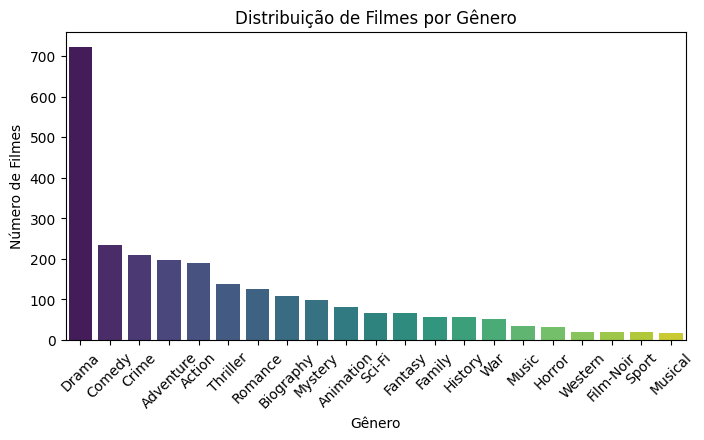

In [290]:
data_exploded = data.copy()
data_exploded = data_exploded.explode('Genre')

genre_counts = data_exploded['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']


plt.figure(figsize=(8, 4))
sns.barplot(x='Genre', y='Count', hue='Genre', data=genre_counts, palette='viridis', dodge=False)
plt.title('Distribuição de Filmes por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Filmes')
plt.legend([],[], frameon=False)
plt.xticks(rotation=45)
plt.show()


 Os gêneros com maior número de filmes são Drama, seguido por Comédia e Crime. Outros gêneros listados em ordem decrescente de contagem de filmes incluem Aventura, Ação, Suspense, Romance, Biografia e assim por diante, até Musical, que tem a menor contagem. Essa representação visual oferece insights sobre a distribuição de filmes em diferentes gêneros, indicando tendências de popularidade ou produção na indústria cinematográfica.

 Para o contexto do classificador de filmes por Gênero, o gráfico fornece insights sobre o desbalanceamento dos dados, pois alguns gêneros, como Drama e Comédia, têm uma contagem significativamente maior do que outros, como Musical ou Film-Noir. O desbalanceamento também pode ter seu impacto suavizado  nos resultados quando é feito uso de um algoritmo robusto a esse tipo de variação, como árvores de decisão ou SVMs.


#### Frequencia de Palavras por Gênero

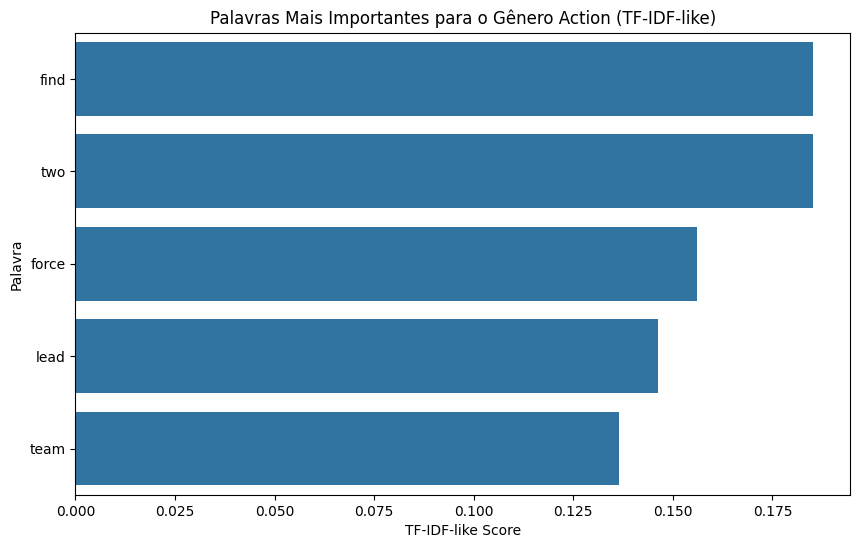

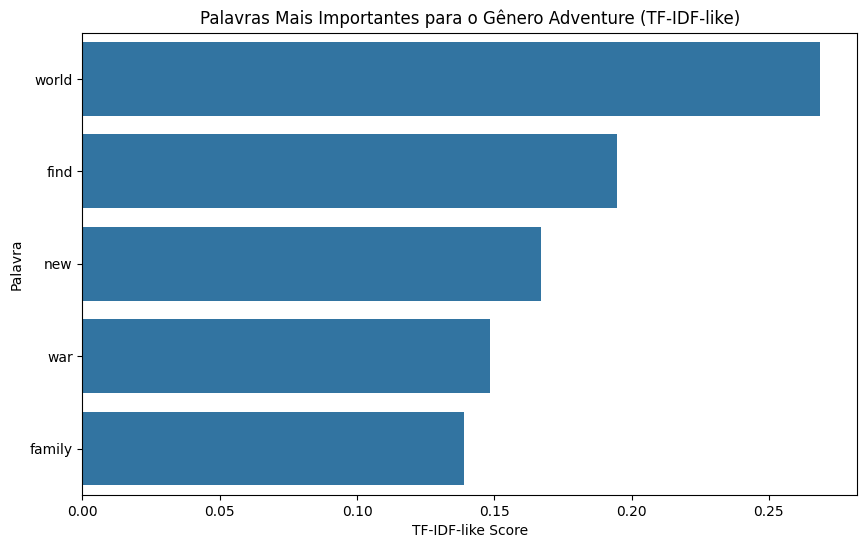

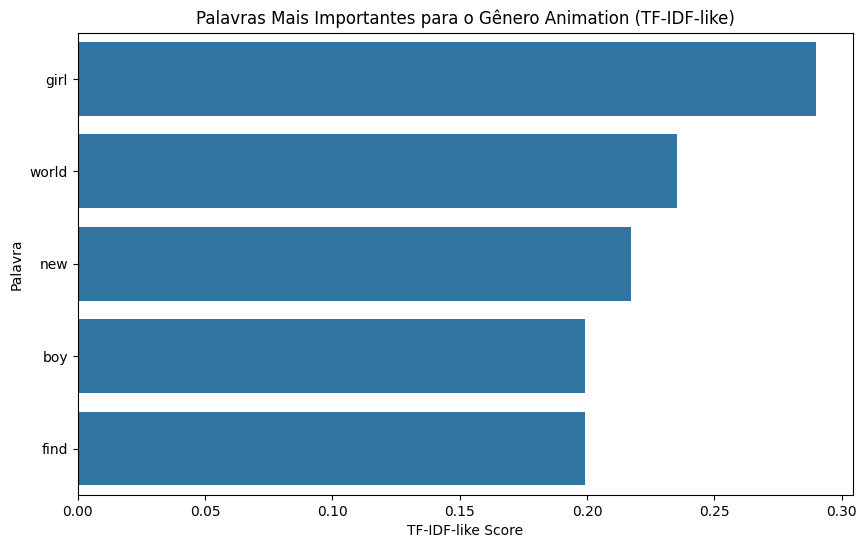

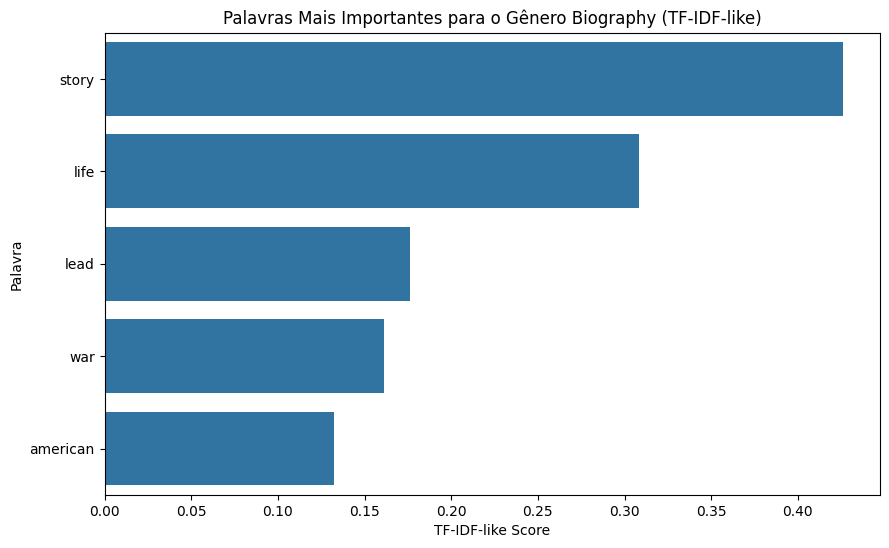

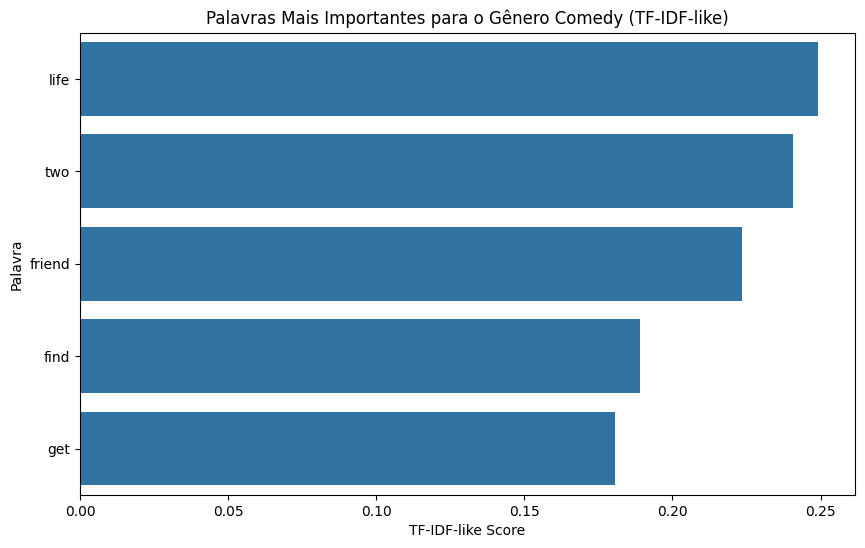

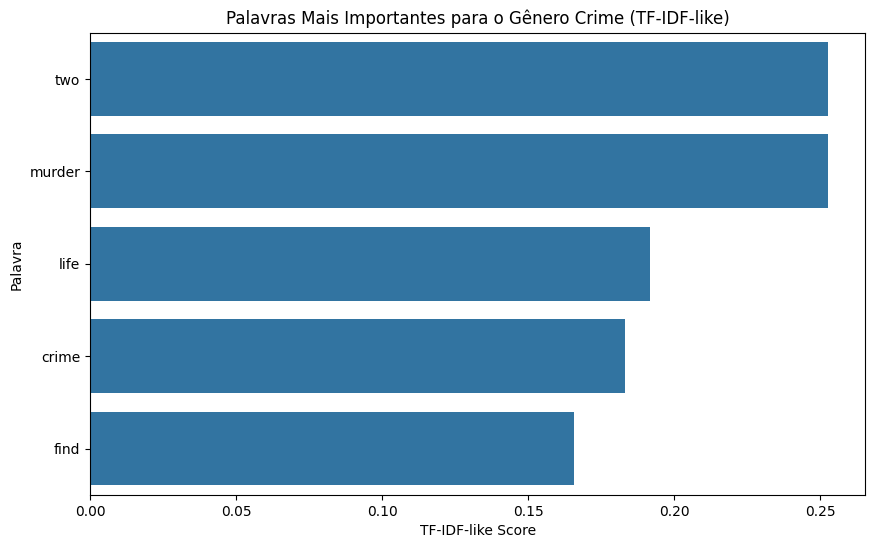

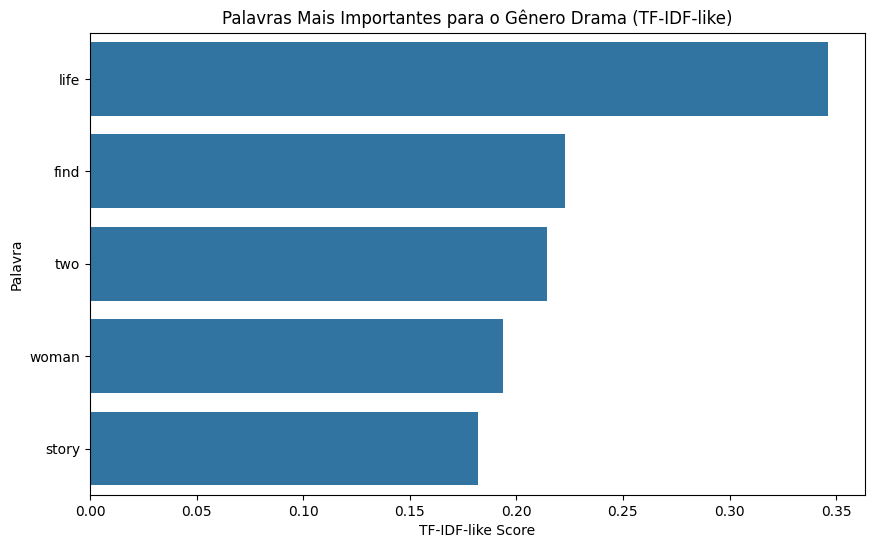

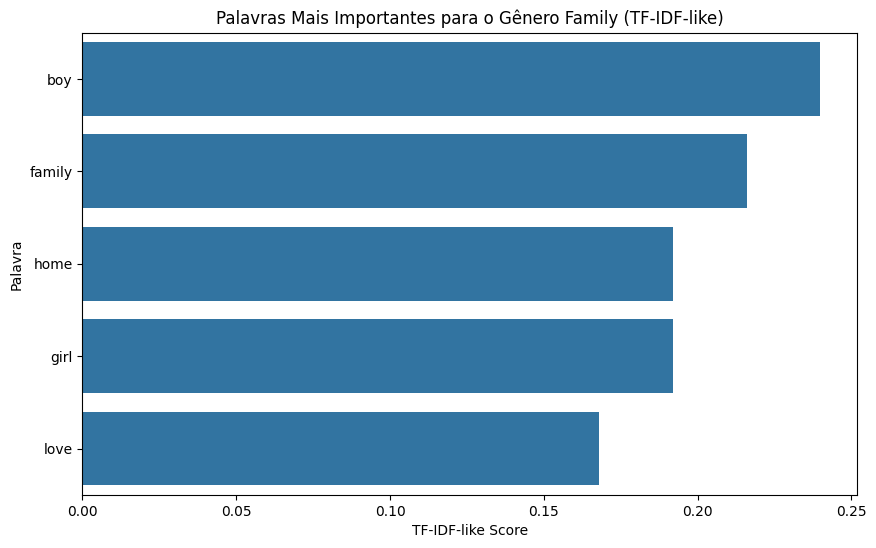

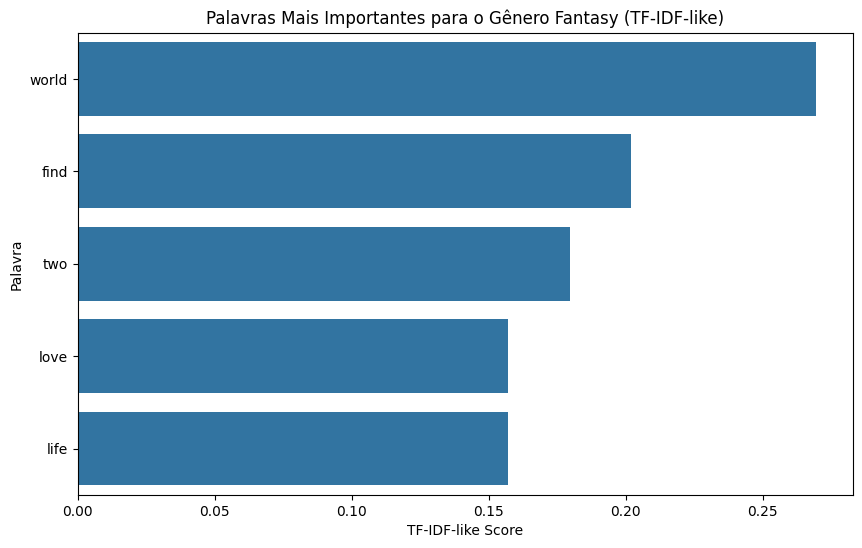

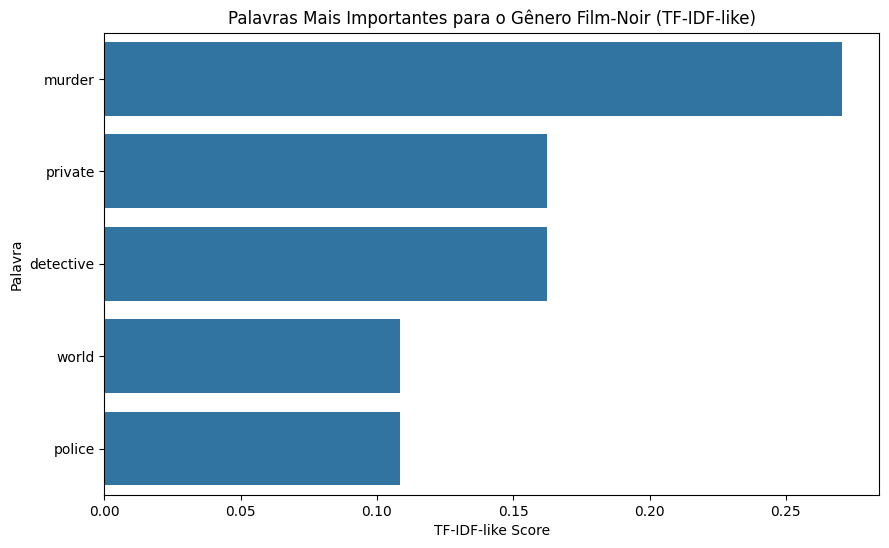

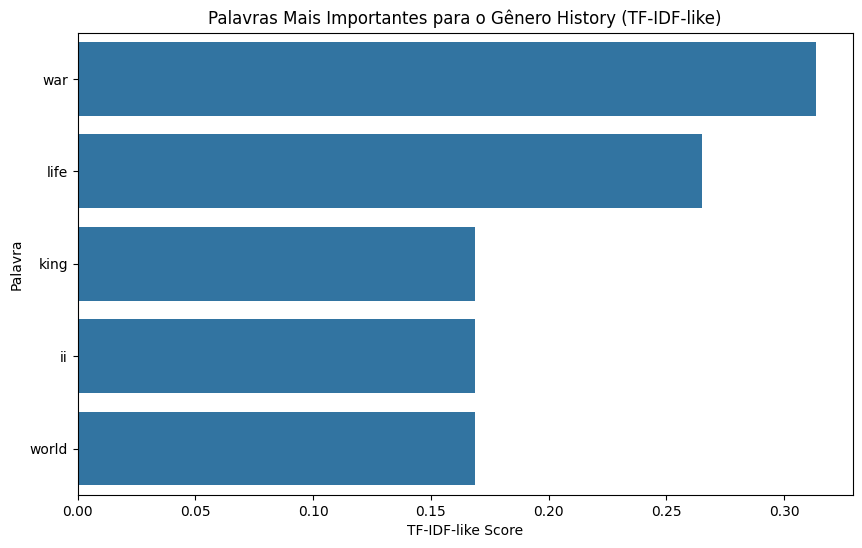

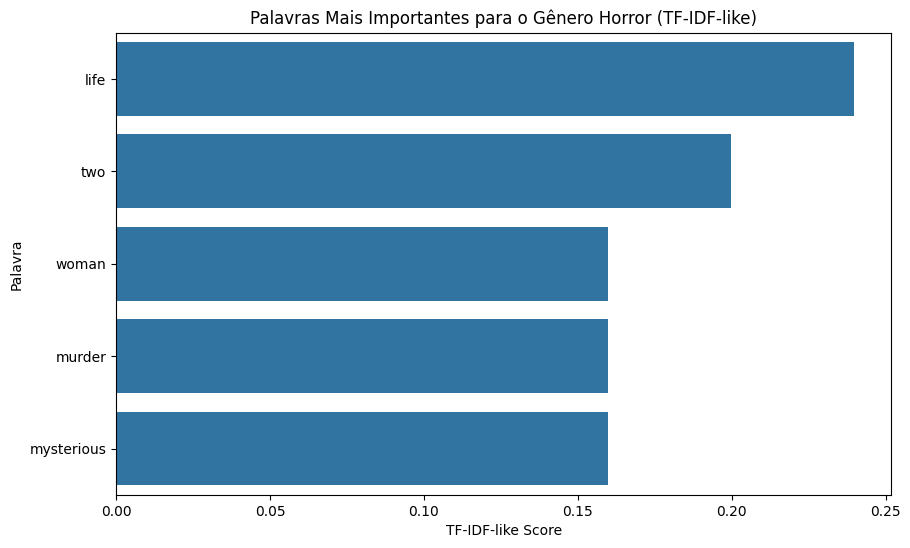

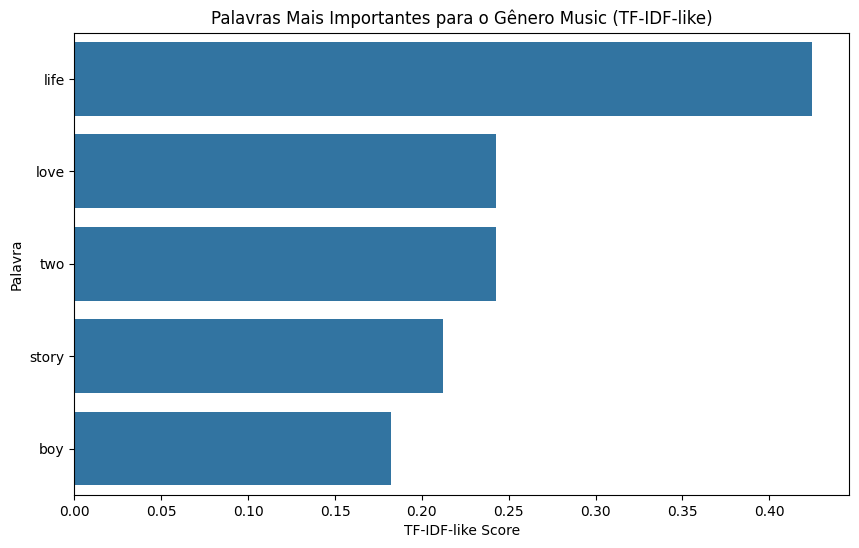

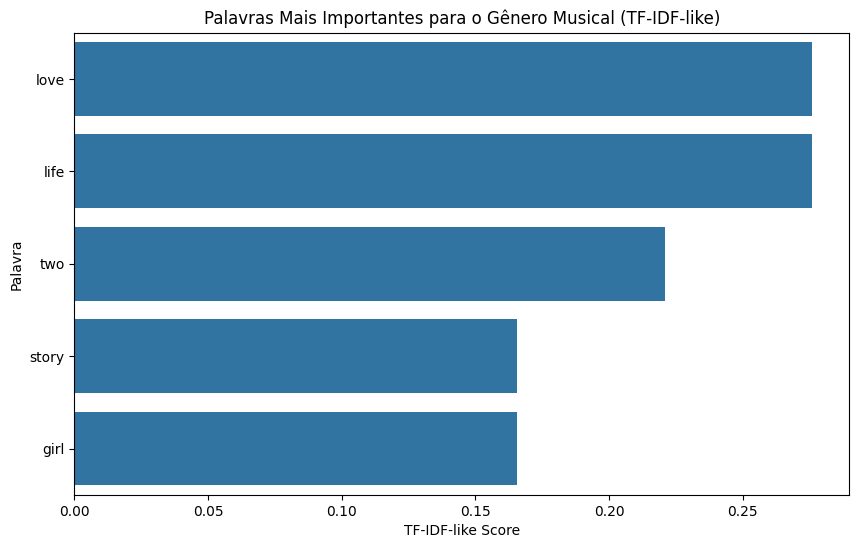

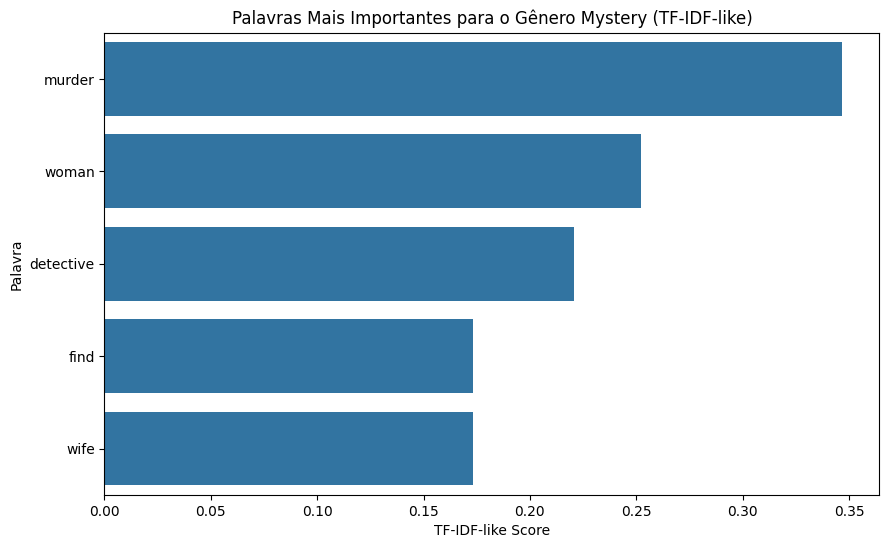

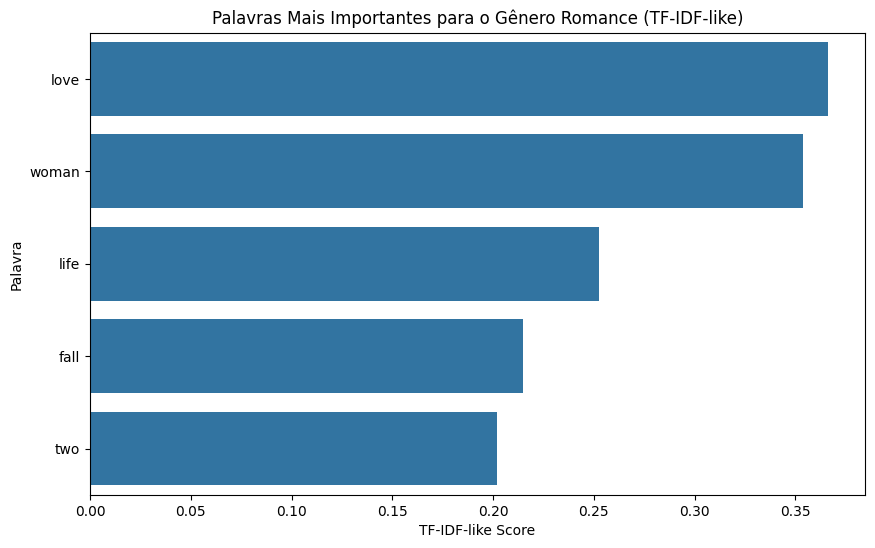

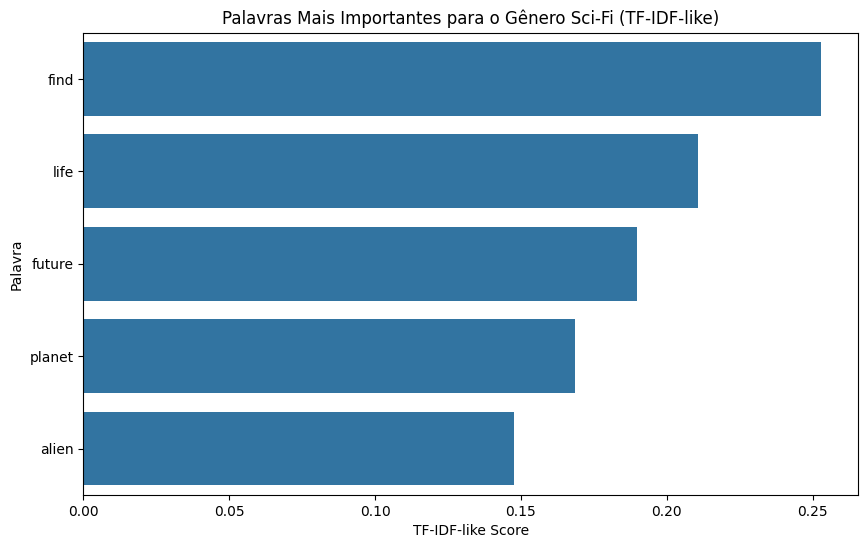

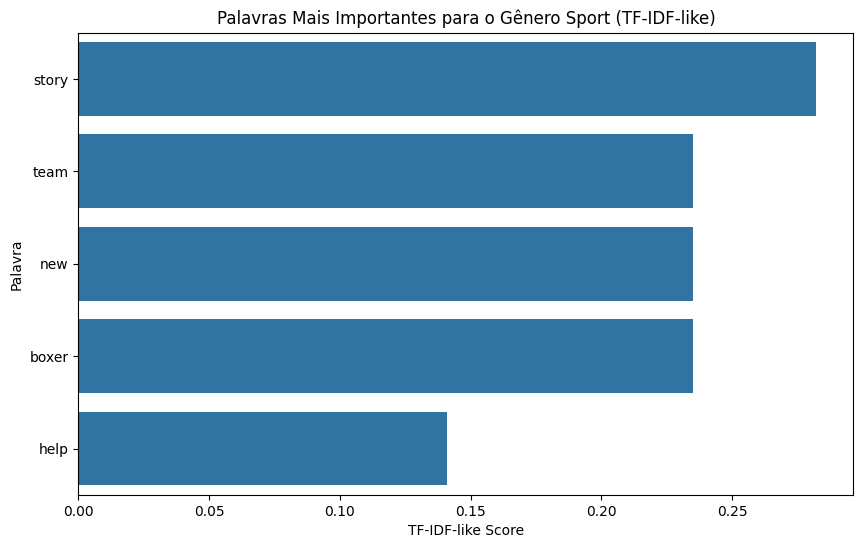

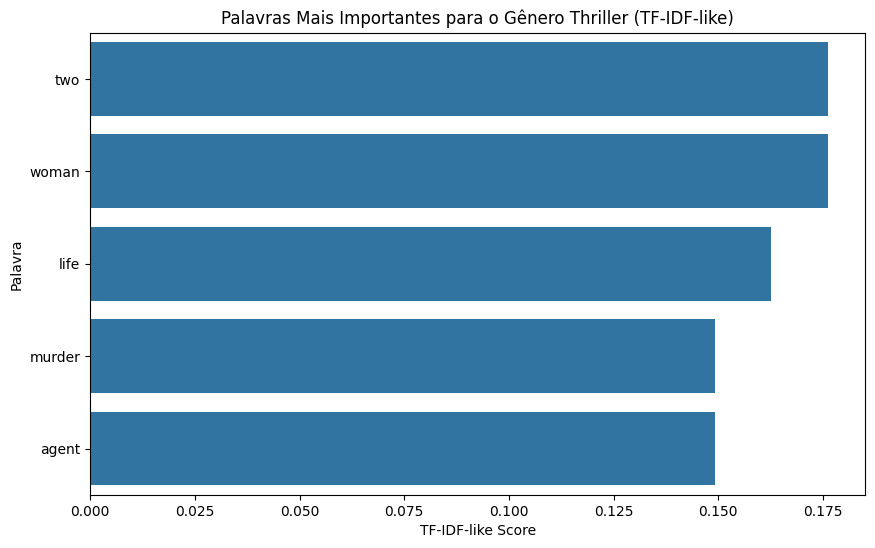

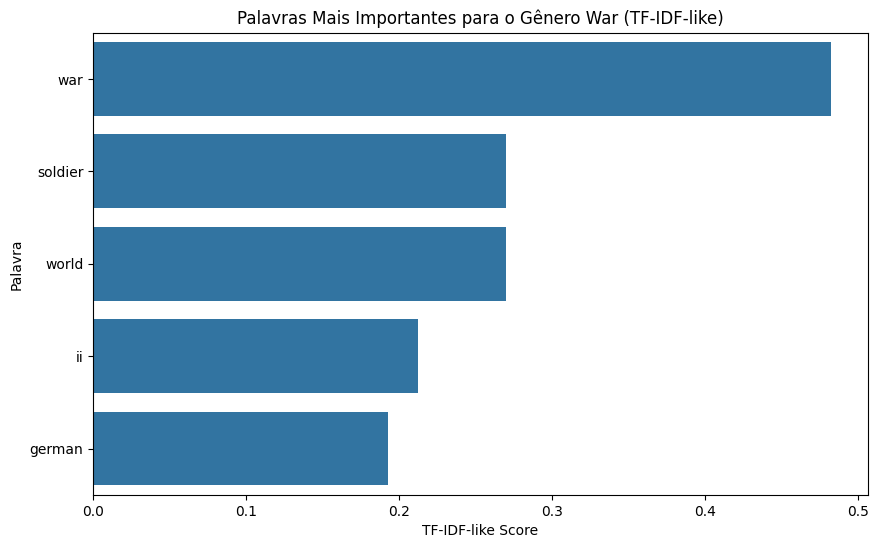

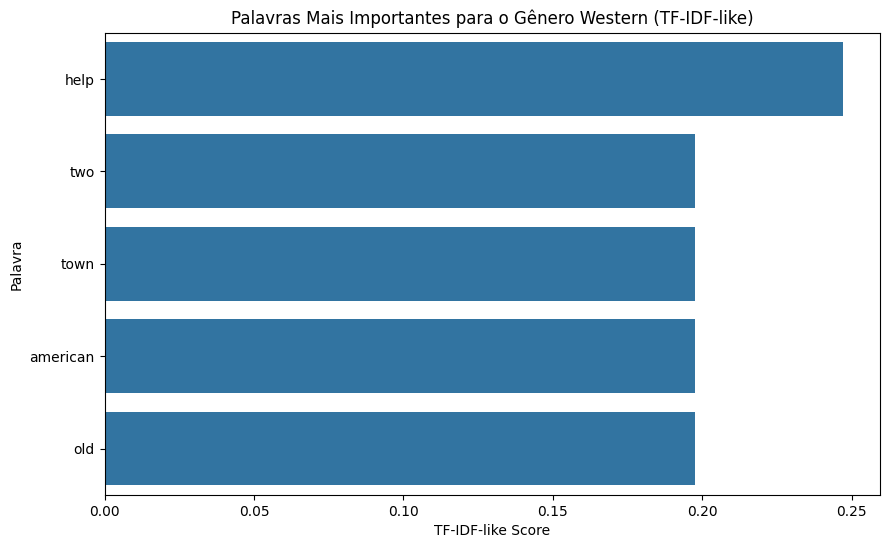

In [289]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')


data_freq = data.copy()
data_freq = data_freq.explode('Genre')

def tokenize(text):
    return text.split()


def calculate_tfidf(genre_overviews):
    tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize)
    tfidf_matrix = tfidf_vectorizer.fit_transform(genre_overviews)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    return pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

genre_overviews = data_freq.groupby('Genre')['Overview'].apply(lambda x: ' '.join(x))

genre_scores = {}
for genre, overview_ in genre_overviews.items():
    genre_scores[genre] = calculate_tfidf([overview_])

top_words = {}
for genre, scores_df in genre_scores.items():
    scores_mean = scores_df.mean().sort_values(ascending=False)
    top_words[genre] = scores_mean.head(5).to_dict()

for genre, words_dict in top_words.items():
    words_df = pd.DataFrame(words_dict.items(), columns=['Word', 'Score'])
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Score', y='Word', data=words_df)
    plt.title(f'Palavras Mais Importantes para o Gênero {genre} (TF-IDF-like)')
    plt.xlabel('TF-IDF-like Score')
    plt.ylabel('Palavra')
    plt.show()

Com os gráficos apresentados élevantada a hipotese que algumas palavras como _must_ ou _young_ que não foram removidas durante o pré-processamento podem gerar ruido por estarem entre as palavras mais frquentes de muitas classes, dependendo do resultado da classifiação isso deve ser averiguado commais cautela. Apesar disso, ppor se tratar de uma classificação multilabel, pode ser que esse comportamento seja esperado.

#### SVD

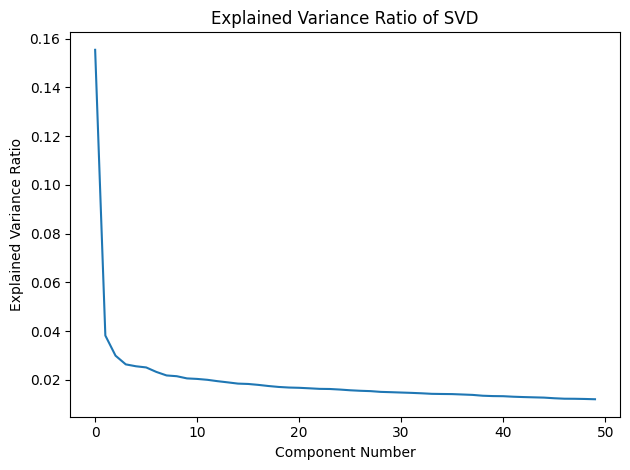

In [291]:
from sklearn.utils.extmath import randomized_svd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

def apply_svd(X_train, n_compts: int, gerete_img: bool):
    U, Sigma, VT = randomized_svd(X_train, n_components=n_compts)
    X_train_reduced = U @ np.diag(Sigma)

    if gerete_img:
        total_variance = np.sum(Sigma**2)
        explained_variance_ratio = (Sigma**2) / total_variance

        plt.plot(explained_variance_ratio)
        plt.title('Explained Variance Ratio of SVD')
        plt.xlabel('Component Number')
        plt.ylabel('Explained Variance Ratio')
        plt.tight_layout()
        plt.show()

    return U, Sigma, VT, X_train_reduced

def transform_test_data(X_test, VT):
    return X_test @ VT.T

data_classifier = data.copy().reset_index(drop=True)
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(data_classifier['Genre'])

X_train, X_test, y_train_classifier, y_test_classifier = train_test_split(overview, labels, test_size=0.2, random_state=42)

U, Sigma, VT, X_train_svd = apply_svd(X_train, 50, True)
X_test_svd = transform_test_data(X_test, VT)

 SVD é uma técnica de álgebra linear usada para decompor uma matriz em três componentes: matriz de valores singulares, matriz de vetores singulares à esquerda e matriz de vetores singulares à direita. Ela é frequentemente aplicada em análise de dados, redução de dimensionalidade.

### Correlações entre nota IMDB, Meta_score e No_of_Votes

Correlacionar essas três características é interessante, pois elas refletem a opinião pública e crítica sobre os filmes da base de dados. Isso é fundamental para algoritmos de recomendação que buscam sugerir títulos aos usuários com base em suas preferências, mesmo que ainda desconheçam os detalhes específicos.

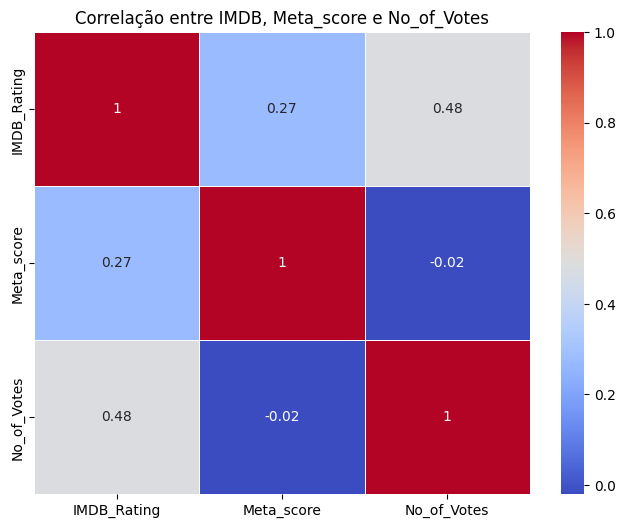

In [292]:
data_corr = data.copy()
correlation_matrix = data_corr[['IMDB_Rating', 'Meta_score', 'No_of_Votes']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlação entre IMDB, Meta_score e No_of_Votes')
plt.show()


* **IMDB e Meta_score**: Existe uma correlação positiva moderada (0,27) entre a pontuação do IMDB e a pontuação da crítica (Meta_score). Isso sugere que filmes bem avaliados pelos usuários também tendem a ter boas pontuações de crítica. A relação não é perfeita, mas ainda indica uma tendência geral.

* **IMDB e No_of_Votes**: Há uma correlação positiva mais forte (0,48) entre a pontuação do IMDB e o número de votos. Isso significa que filmes populares (com mais votos) tendem a ter melhores avaliações no IMDB. Isso pode ser útil para o algoritmo de recomendação, pois pode priorizar filmes com alta pontuação no IMDB e muitos votos.

* **Meta_score e No_of_Votes**: A correlação entre a pontuação da crítica e o número de votos é praticamente nula (-0,02). Isso sugere que a opinião dos críticos não está fortemente relacionada à popularidade do filme.

### Correlações de Faturamento

Para estudar este caso, é necessário primeiro listar os objetivos dessa análise exploratória. De acordo com os demais processos desenvolvidos neste estudo, os objetivos da análise são:

* Selecionar as melhores características para a criação de um modelo de recomendação de filmes;
* Relacionar as características com o faturamento dos filmes;
* Agrupar o overview de acordo com as categorias de gênero de um filme;
* Selecionar as melhores características correlacionadas com a nota do IMDb.

Durante o cálculo de correlação, utilizamos um método mais robusto e menos sensível a outliers.

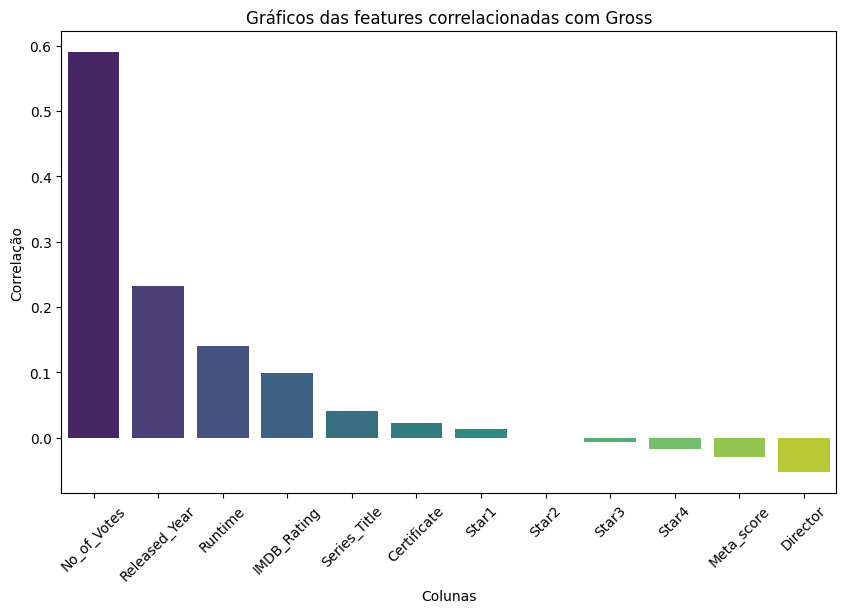

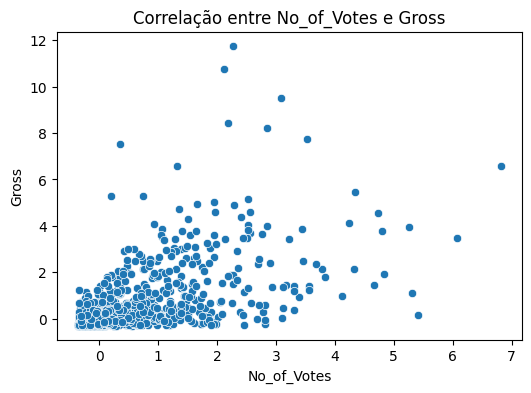

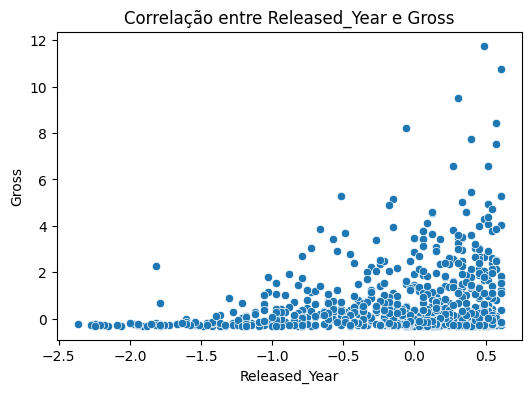

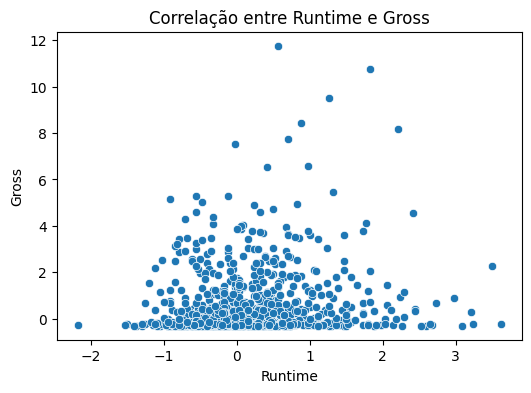

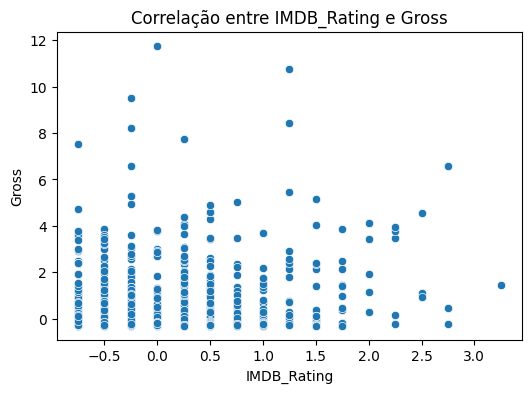

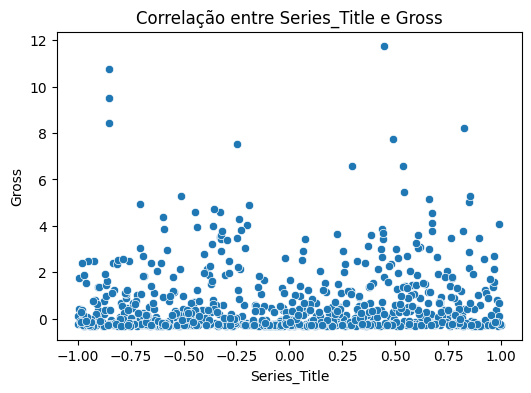

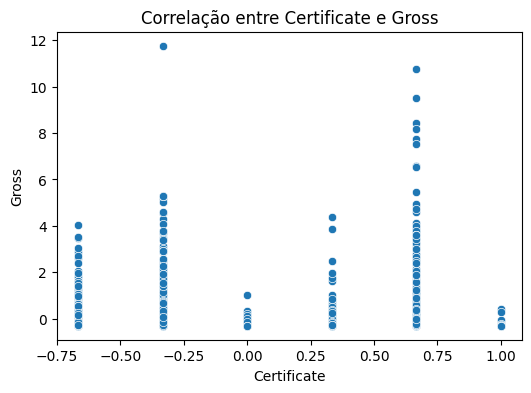

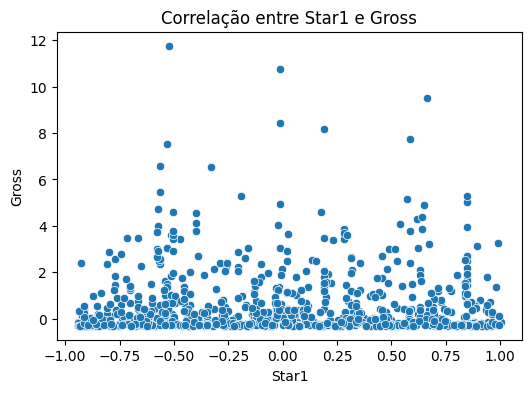

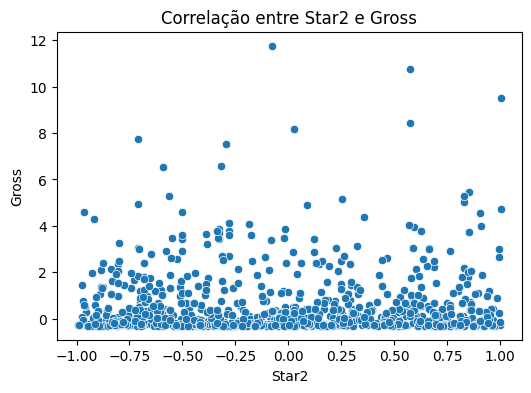

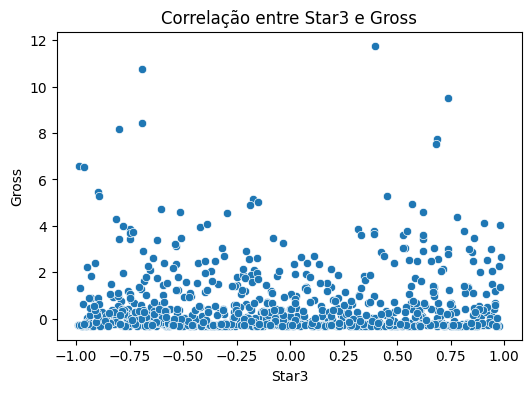

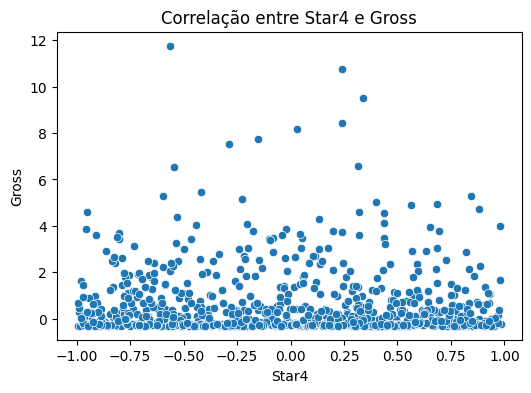

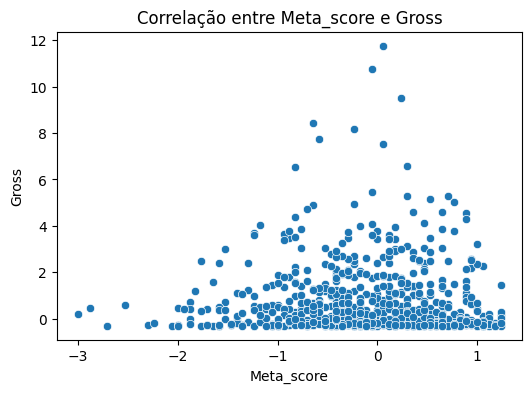

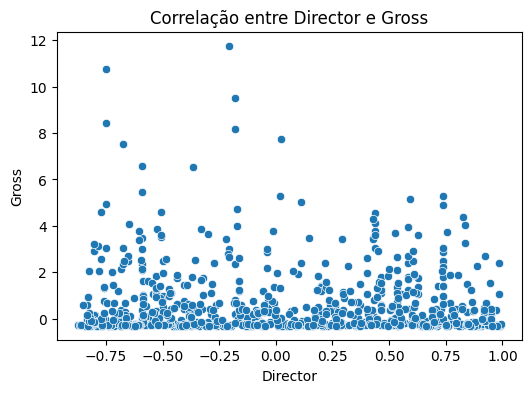

In [295]:
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns


df = data.drop(columns=['Overview', 'Genre'])

cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Use RobustScaler para tornar a correlação mais robusta a outliers
scaler = RobustScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

correlation = df.corr()['Gross'].sort_values(ascending=False)

top_corr = correlation.iloc[1:]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.index, y=top_corr.values, palette='viridis', hue=top_corr.index, dodge=False)
plt.title('Gráficos das features correlacionadas com Gross')
plt.xlabel('Colunas')
plt.ylabel('Correlação')
plt.legend([],[], frameon=False)
plt.xticks(rotation=45)
plt.show()

os.makedirs("plots", exist_ok=True)
map_corr_plots = {}

for col in top_corr.index:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col, y='Gross')
    plt.title(f'Correlação entre {col} e Gross')
    file_path = f"plots/correlacao_{col}_gross.png"
    plt.savefig(file_path, bbox_inches='tight')
    map_corr_plots[col] = file_path

    plt.show()


também foi realizado a correlação de cada gênero com o faturamento

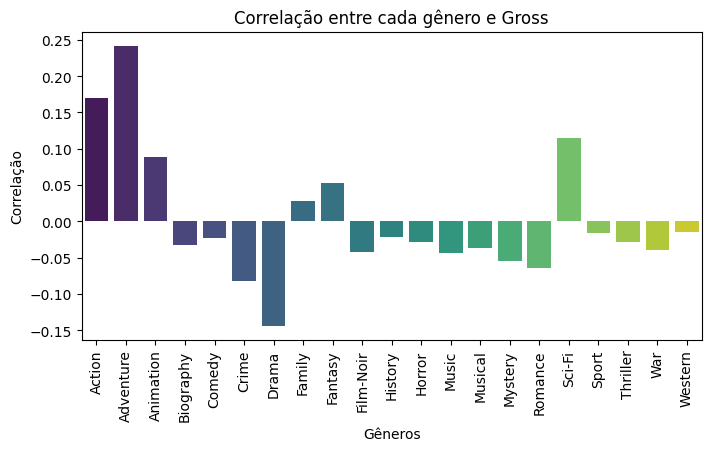

In [296]:
df = data[['Gross', 'Genre']]

df_exploded = df.explode('Genre')

df_dummies = pd.get_dummies(df_exploded['Genre'])

df_joined = pd.concat([df_exploded[['Gross']], df_dummies], axis=1)

correlation = df_joined.corr()['Gross'].sort_values(ascending=False)

genre_corr = correlation.filter(items=df_dummies.columns)

plt.figure(figsize=(8, 4))
sns.barplot(x=genre_corr.index, y=genre_corr.values, palette='viridis', hue=genre_corr.index, dodge=False)
plt.title('Correlação entre cada gênero e Gross')
plt.xlabel('Gêneros')
plt.ylabel('Correlação')
plt.legend([],[], frameon=False)
plt.xticks(rotation=90)
file_path = f"plots/correlacao_Genre_gross.png"
plt.savefig(file_path, bbox_inches='tight')
map_corr_plots['Genre'] = file_path
plt.show()

Análise do gráfico da correlação entre **No_of_Votes** e **Gross**:

- **Correlação Positiva**: O gráfico mostra uma tendência positiva, onde um aumento no número de votos está associado a um aumento no faturamento.
- **Concentração de Dados**: A maioria dos pontos está concentrada na parte inferior esquerda do gráfico. No entanto, há alguns pontos dispersos na parte superior direita.

Análise do gráfico da correlação entre **Released_Year** e **Gross**:

- **Correlação Positiva**: O gráfico mostra uma tendência positiva, onde filmes lançados em anos mais recentes tendem a ter um maior faturamento.
- **Concentração de Dados**: A maioria dos pontos está concentrada entre os anos de 1980 e 2020, com valores de faturamento variando amplamente.

Análise do gráfico da correlação entre **Runtime** e **Gross**:

- **Correlação Positiva**: O gráfico mostra uma tendência positiva, onde filmes com maior tempo de duração tendem a ter um maior faturamento.
- **Concentração de Dados**: A maioria dos pontos está concentrada entre 50 e 150 minutos de duração, com valores de faturamento variando amplamente.

Análise do gráfico da correlação entre **Meta_score** e **Gross**:

- **Correlação Positiva**: O gráfico mostra uma tendência positiva, onde filmes com uma pontuação Meta_score mais alta tendem a ter um maior faturamento.
- **Concentração de Dados**: A maioria dos pontos está concentrada entre as pontuações 30 e 100, com valores de faturamento variando amplamente.

O gráfico de correlação do faturamento por gênero traduz que:

1. **Correlação Positiva**: Gêneros como **Action**, **Adventure**,  **Animation**  e **Sci-fi** têm correlações positivas mais altas com 'Gross'.

2. **Correlação Negativa**: Gêneros como **Crime** e **Drama** têm correlações negativas.

3. **Interpretação dos Valores**: A correlação varia de -1 a 1. Valores próximos de 1 indicam uma forte correlação positiva, enquanto valores próximos de -1 indicam uma forte correlação negativa. Valores próximos de 0 indicam pouca ou nenhuma correlação.Esses insights podem ser usados para decisões de marketing e produção.

### Correlações da nota do IMDB

Correlacionar as notas do IMDb é importante para entender como selecionar as características para o algoritmo de regressão, que visa prever a nota do IMDb a partir dos demais dados.

/tmp/ipykernel_13157/340803614.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.index, y=top_corr.values, palette='viridis')


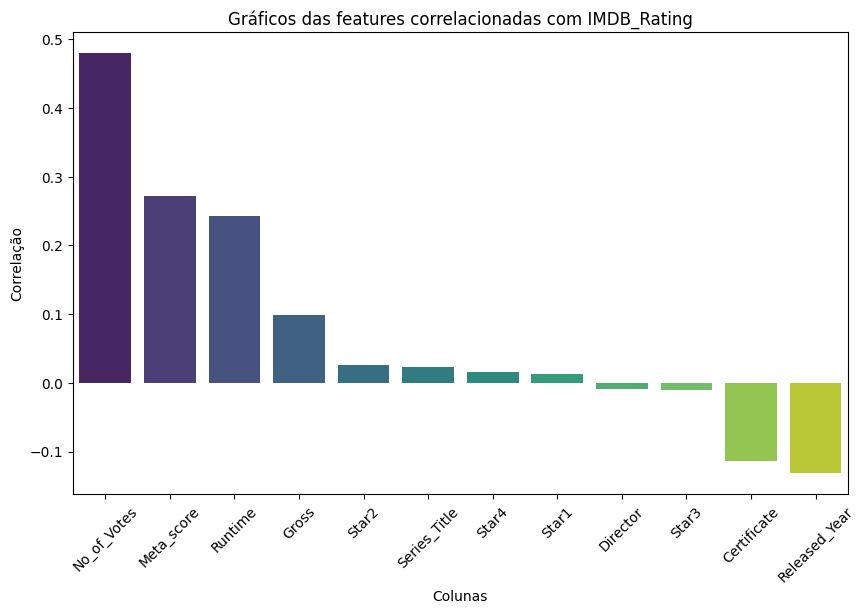

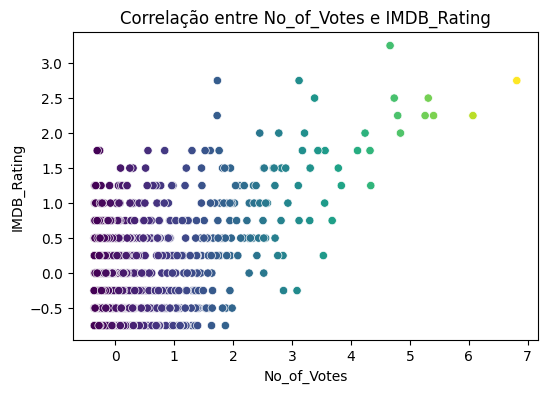

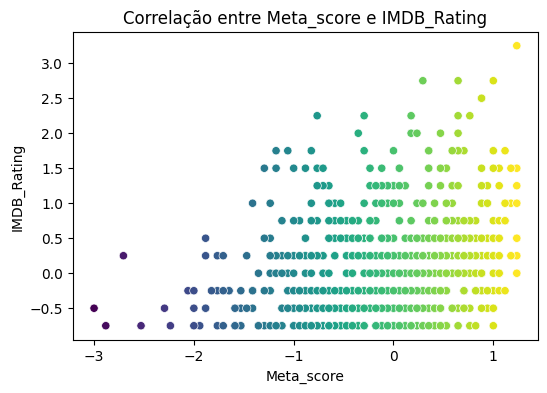

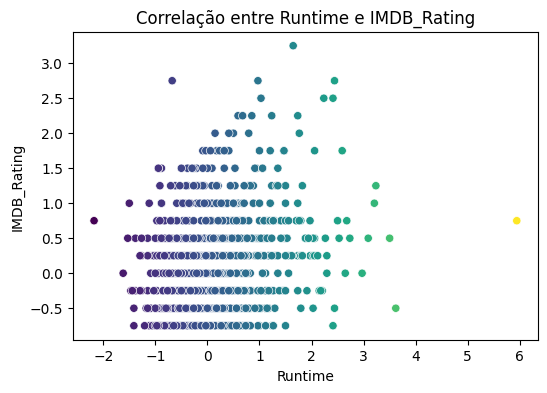

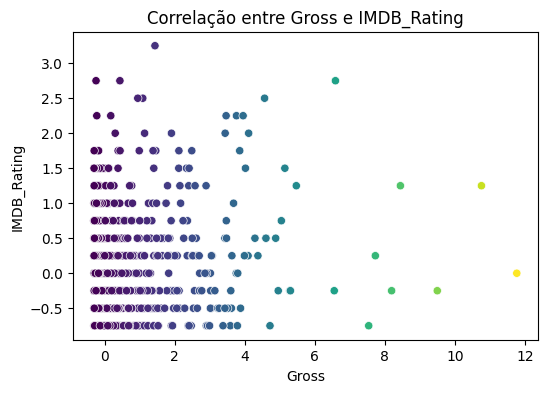

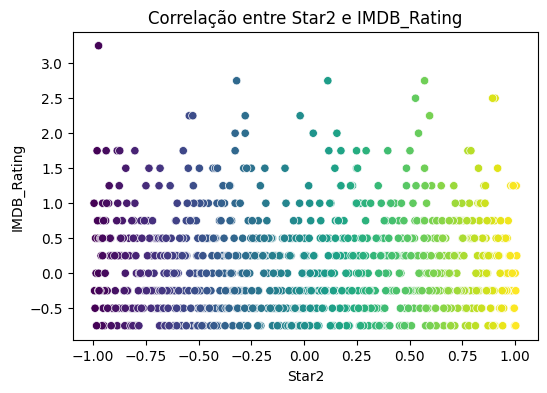

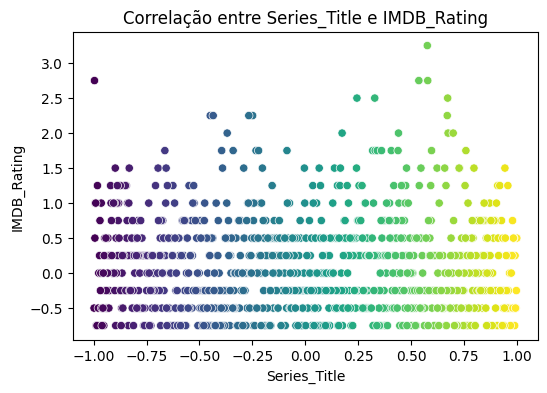

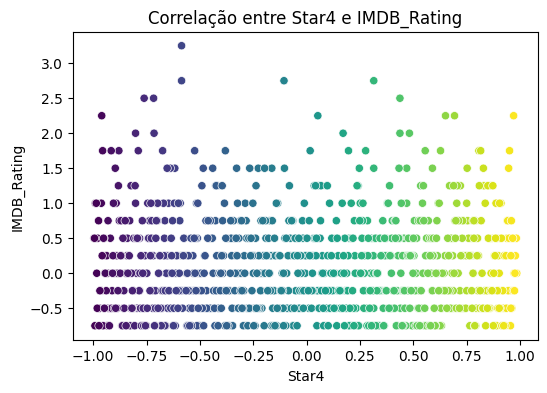

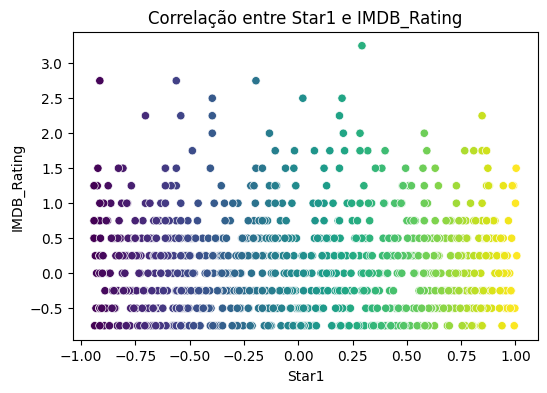

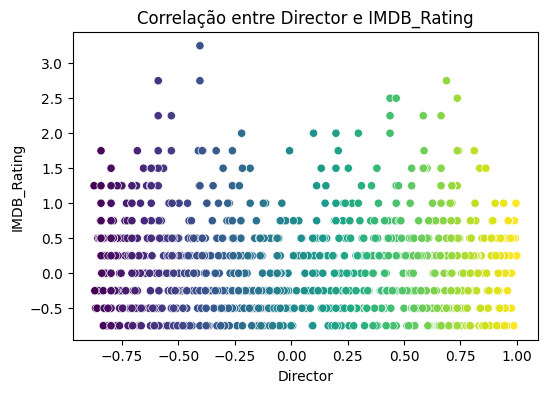

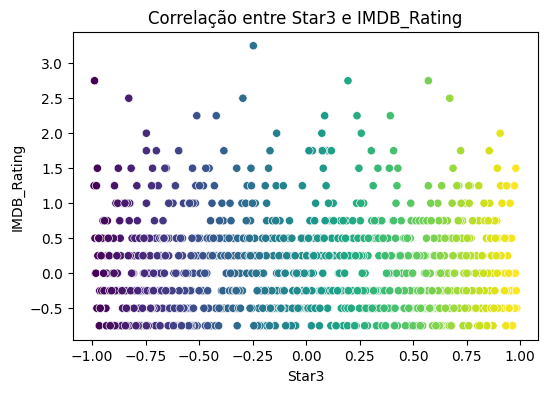

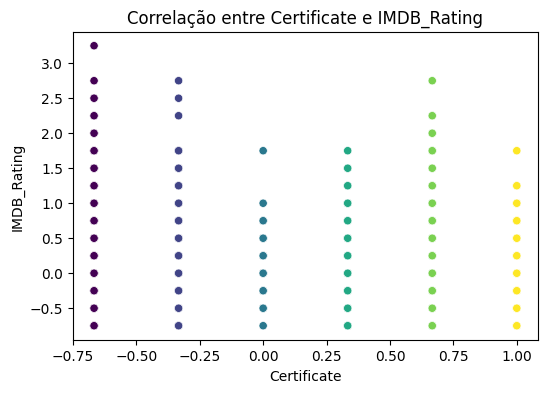

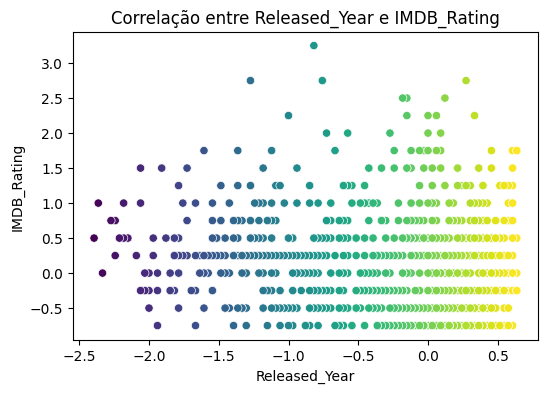

In [297]:
df = data.drop(columns=['Overview', 'Genre'])

cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Use RobustScaler para tornar a correlação mais robusta a outliers
scaler = RobustScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

correlation = df.corr()['IMDB_Rating'].sort_values(ascending=False)

top_corr = correlation.iloc[1:]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.index, y=top_corr.values, palette='viridis')
plt.title('Gráficos das features correlacionadas com IMDB_Rating')
plt.xlabel('Colunas')
plt.ylabel('Correlação')
plt.xticks(rotation=45)
plt.show()

for col in top_corr.index:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col, y='IMDB_Rating',  palette='viridis', hue=col, legend=False) 
    plt.title(f'Correlação entre {col} e IMDB_Rating')
    plt.show()

Análise do gráfico "Correlação entre No_of_Votes e IMDB_Rating":

* A maioria dos pontos está concentrada na parte inferior da escala de "No_of_Votes", indicando que muitos filmes têm poucos votos.Parece haver uma tendência de que filmes com mais votos (à direita do gráfico) tendem a ter pontuações mais altas no IMDB (acima de 2,0).Filmes com poucos votos (à esquerda do gráfico) variam amplamente em suas pontuações.

Análise do gráfico "Correlação entre Meta_score e IMDB_Rating":

* A tendência observada no gráfico sugere que, em geral, filmes com pontuações mais altas no IMDB também tendem a ter pontuações mais altas da crítica. No entanto, essa relação não é perfeita. Existem filmes com alta pontuação no IMDB que receberam pontuações variadas da crítica. A correlação entre as duas pontuações não é perfeita, mas ainda existe uma relação positiva. Isso significa que, em média, quando um filme tem uma boa pontuação no IMDB, ele também tende a ter uma pontuação decente da crítica.

Análise do gráfico "Correlação entre Runtime e IMDB Rating":

* Pelo gráfico, parece haver um agrupamento de pontos de dados em torno do intervalo de 1 a 3 no eixo Runtime e entre 1.0 e 2.5 no eixo IMDB Rating. Parece haver uma leve tendência ascendente indicando que, à medida que o Runtime aumenta, há uma tendência para o IMDB Rating aumentar também, sugerindo uma correlação positiva entre essas duas variáveis.

Análise do gráfico "Correlação entre Gross e IMDB Rating":

* Ainda não há uma tendência clara de aumento ou diminuição no gráfico. Os pontos de dados estão espalhados, o que sugere que o faturamento bruto não tem uma relação direta e consistente com a classificação do IMDB. A correlação entre o faturamento bruto e a classificação do IMDB ainda parece ser fraca. O gráfico sugere que o sucesso financeiro de um filme (medido pelo faturamento bruto) não está fortemente correlacionado com a avaliação do público (medida pela classificação do IMDB). Isso pode indicar que outros fatores, além do faturamento bruto, influenciam a classificação do IMDB de um filme.



Correlação de Gênero com a a nota do IMDB:

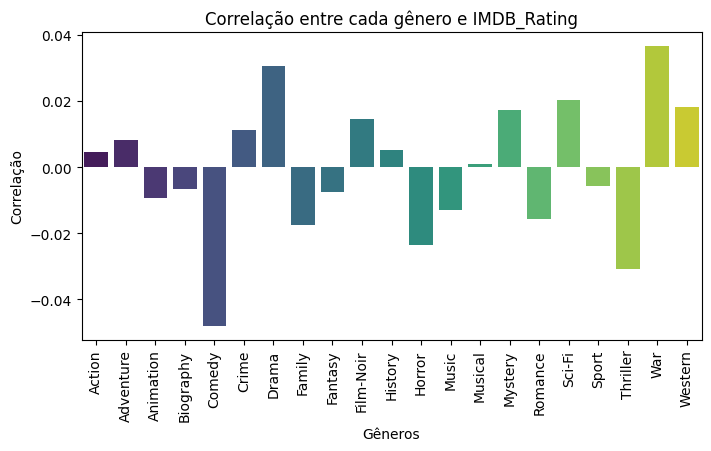

In [298]:
df = data[['IMDB_Rating', 'Genre']]

df_exploded = df.explode('Genre')

df_dummies = pd.get_dummies(df_exploded['Genre'])

df_joined = pd.concat([df_exploded[['IMDB_Rating']], df_dummies], axis=1)

correlation = df_joined.corr()['IMDB_Rating'].sort_values(ascending=False)

genre_corr = correlation.filter(items=df_dummies.columns)

plt.figure(figsize=(8, 4))
sns.barplot(x=genre_corr.index, y=genre_corr.values, palette='viridis', hue=genre_corr.index, dodge=False)
plt.title('Correlação entre cada gênero e IMDB_Rating')
plt.xlabel('Gêneros')
plt.ylabel('Correlação')
plt.legend([],[], frameon=False)
plt.xticks(rotation=90)
plt.show()

O gráfico é um gráfico  "Correlação entre cada gênero e IMDB Rating" mostra a correlação entre os gêneros de filmes e suas classificações no IMDB. Os gêneros estão distribuídos de forma variada, com alguns tendo correlações positivas e outros tendo correlações negativas com a classificação do IMDB. Por exemplo, gêneros como Musical e Guerra têm uma correlação positiva mais alta, enquanto gêneros como Ação e Horror mostram uma correlação negativa. De forma geral, parece haver uma correlação variável entre o gênero e a classificação do IMDB; alguns gêneros tendem a ter classificações mais altas, enquanto outros estão associados a classificações mais baixas no IMDB.

# Análise de Mercado e Percepções Cinematográficas

## Análise de Recomendação de Filme

Para recomendar um filme a uma pessoa sem nenhum dado inicial, a abordagem é similar aos algoritmos de recomendação de serviços de streaming ao encontrar um novo usuário. Presume-se que essa pessoa se encontra dentro da curva de gostos dos usuários conhecidos e compartilha o mesmo apreço pelos itens mainstream do catálogo. Por isso, a seleção das características No_of_votes, Meta_score e IMDB_Rating é utilizada, pois essas características são paralelas às que um algoritmo de recomendação de streaming utilizaria. Além disso, a correlação entre elas já foi estudada e se comprovou possitiva de forma geral.

In [302]:
data_recomend = data.copy()
highly_rated = data_recomend[(data_recomend['IMDB_Rating'] > 9.1) & (data_recomend['Meta_score'] > 90)]

if not highly_rated.empty:
    recommended_movie = highly_rated.sort_values(by='No_of_Votes', ascending=False).iloc[0]
    print(f"Eu recomendaria o filme '{recommended_movie['Series_Title']}'.")
else:
    print("Não há filmes que atendam aos critérios de recomendação.")


Eu recomendaria o filme 'The Godfather'.


#### Recomendação com texto base de hobies

Alguns serviços de streaming, ao receberem um novo usuário, fazem algumas perguntas sobre seus gostos para direcionar os algoritmos de recomendação para aquele nicho específico. Neste estudo, foi executado um algoritmo bem mais simplificado que emula essa habilidade.

In [304]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

data_recomend['Genre_str'] = data_recomend['Genre'].apply(lambda x: ' '.join(x))

vectorizer = TfidfVectorizer()
vectorizer.fit(data_recomend['Genre_str'])

text = "I like music and romance."

text_vector = vectorizer.transform([text])

similarity_scores = data_recomend['Genre_str'].apply(lambda x: cosine_similarity(vectorizer.transform([x]), text_vector))

recommended_movie = data_recomend.iloc[similarity_scores.idxmax()]

print(f"Eu recomendaria o filme '{recommended_movie['Series_Title']}'.")

Eu recomendaria o filme 'The Truman Show'.


## Predição do genero do filme

Nesse estudo, foi realizada a implementação de classificação multilabel, um tipo de aprendizado supervisionado onde uma instância pode ser associada a múltiplos rótulos. Neste caso, estamos tentando prever os gêneros de um filme com base em sua descrição.

Inicialmente, foram definidos os algoritmos utilizados: **Random Forest**, **K-Nearest Neighbors (KNN)**, **Support Vector Machines (SVM)**, **Logistic Regression** e **Gradient Boosting**. Cada um desses algoritmos tem suas próprias forças e pode funcionar bem em tipos de dados textuais, por isso é útil compará-los. Os modelos foram ajustados para otimizar três métricas - F1 Score, Jaccard Score e Hamming Loss - para cada modelo. Essas métricas nos ajudam a entender o desempenho de cada modelo dentro do contexto de classificação multilabel, fornecendo uma visão abrangente de precisão, capacidade de capturar múltiplas classes simultaneamente e a proporção de rótulos incorretos atribuídos.

Sobre os algoritmos utilizados:

1. **Random Forest**: Este é um algoritmo de aprendizado de máquina versátil e fácil de usar que produz excelentes resultados na maioria das vezes. Ele também é eficaz para problemas de classificação multilabel devido à sua capacidade de lidar com dados complexos e diversas interações entre características.

2. **K-Nearest Neighbors (KNN)**: Este é um algoritmo simples que armazena todos os casos disponíveis e classifica novos casos com base em uma medida de similaridade. Ele é útil quando os dados não são linearmente separáveis, ou seja, quando as classes não podem ser separadas por uma linha reta.

3. **Support Vector Machines (SVM)**: Este é um algoritmo que pode lidar com espaços de alta dimensão e é eficaz em casos onde o número de dimensões é maior que o número de amostras, sendo muito útil em classificações textuais devido à sua capacidade de encontrar fronteiras de decisão ótimas em espaços complexos.

4. **Logistic Regression**: Este é um algoritmo simples e rápido para problemas de classificação multilabel. Ele é útil para entender a influência de várias características independentes em uma única variável de saída, funcionando bem em dados textuais por sua capacidade de interpretar coeficientes e probabilidades associadas às predições.

5. **Gradient Boosting**: Este é um algoritmo que produz um modelo de previsão na forma de um conjunto de modelos de previsão fracos. Ele constrói o modelo em etapas, como outros métodos de boosting, e os generaliza permitindo uma função de perda otimizável arbitrária, sendo particularmente eficaz em capturar padrões complexos e interações sutis nos dados.

Cada um desses algoritmos foi testado e comparado para identificar o mais adequado para prever os gêneros de filmes com base em descrições textuais, buscando sempre otimizar a precisão e a capacidade de lidar com a natureza multilabel do problema.

### Avaliando os Resultados

#### Seleção de Hiperparâmetros

tempo médio com CPU e 8G de ram: 25min

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score, jaccard_score, hamming_loss

best_estimator = {}
models = {
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': OneVsRestClassifier(SVC()),
    'Logistic Regression': OneVsRestClassifier(LogisticRegression()),
    'Gradient Boosting': OneVsRestClassifier(GradientBoostingClassifier())
}

param_grid = {
    'Random Forest': {
        'n_estimators': [10, 50, 100],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'KNN': {
        'n_neighbors': [3, 5, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'SVM': {
        'estimator__C': [0.1, 1, 10],
        'estimator__kernel': ['linear', 'rbf']
    },
    'Logistic Regression': {
        'estimator__C': [0.1, 1, 10],
        'estimator__penalty': ['l2']
    },
    'Gradient Boosting': {
        'estimator__n_estimators': [10, 50, 100],
        'estimator__learning_rate': [0.01, 0.1, 1],
        'estimator__max_depth': [3, 5, 10]
    }
}

results = {'Model': [], 'F1 Score': [], 'Jaccard Score': [], 'Hamming Loss': []}
for name, model in models.items():
    grid = GridSearchCV(model, param_grid[name], cv=3, scoring='f1_micro')

    grid.fit(X_train_svd, y_train_classifier)
    print(f"Melhores parâmetros para {name}: {grid.best_params_}")
    predictions = grid.best_estimator_.predict(X_test_svd)
    f1 = f1_score(y_test_classifier, predictions, average='micro')
    jaccard = jaccard_score(y_test_classifier, predictions, average='micro')
    hamming = hamming_loss(y_test_classifier, predictions)

    results['Model'].append(name)
    results['F1 Score'].append(f1)
    results['Jaccard Score'].append(jaccard)
    results['Hamming Loss'].append(hamming)

results_df = pd.DataFrame(results)

print(results_df)

barWidth = 0.25
r1 = np.arange(len(results['Model']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(10, 5))

plt.bar(r1, results['F1 Score'], color='pink', width=barWidth, edgecolor='grey', label='F1 Score')
plt.bar(r2, results['Jaccard Score'], color='y', width=barWidth, edgecolor='grey', label='Jaccard Score')
plt.bar(r3, results['Hamming Loss'], color='purple', width=barWidth, edgecolor='grey', label='Hamming Loss')
plt.xlabel('Modelos', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(results['F1 Score']))], results['Model'])

plt.legend()
plt.show()


#### Hiperparâmetros ja testados

In [309]:
tested_params = {'Random Forest': {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 10},
                 'KNN': {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'},
                 'SVM': {'C': 10, 'kernel': 'rbf'},
                 'Logistic Regression': {'C': 10, 'penalty': 'l2'},
                 'Gradient Boosting': {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
}

#### Aplicação dos modelos

                 Model  F1 Score  Jaccard Score  Hamming Loss
0        Random Forest  0.443812       0.285192      0.093095
1                  KNN  0.375691       0.231293      0.107619
2                  SVM  0.465923       0.303716      0.102619
3  Logistic Regression  0.449788       0.290146      0.092619
4    Gradient Boosting  0.425287       0.270073      0.095238


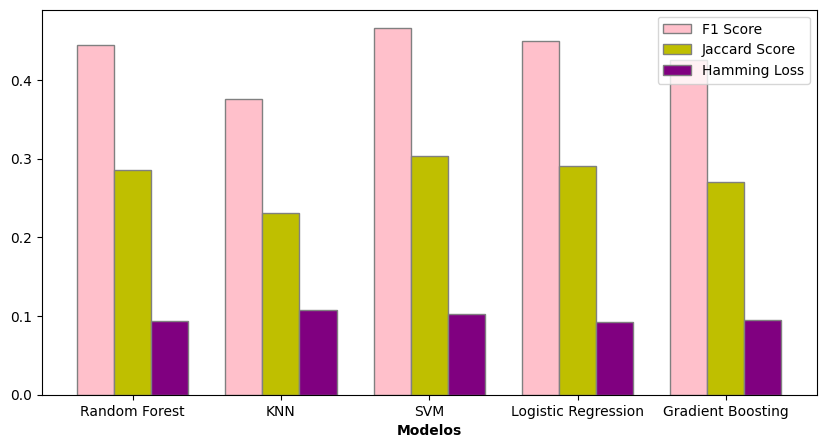

In [310]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pickle
import os
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score, jaccard_score, hamming_loss
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

models = {
    'Random Forest': RandomForestClassifier(**tested_params['Random Forest']),
    'KNN': KNeighborsClassifier(**tested_params['KNN']),
    'SVM': OneVsRestClassifier(SVC(**tested_params['SVM'], probability=True)),
    'Logistic Regression': OneVsRestClassifier(LogisticRegression(**tested_params['Logistic Regression'])),
    'Gradient Boosting': OneVsRestClassifier(GradientBoostingClassifier(**tested_params['Gradient Boosting']))
}

results = {'Model': [], 'F1 Score': [], 'Jaccard Score': [], 'Hamming Loss': []}

os.makedirs("models", exist_ok=True)

for name, model in models.items():
    model.fit(X_train_svd, y_train_classifier)
    predictions = model.predict(X_test_svd)
    f1 = f1_score(y_test_classifier, predictions, average='micro')
    jaccard = jaccard_score(y_test_classifier, predictions, average='micro')
    hamming = hamming_loss(y_test_classifier, predictions)
    results['Model'].append(name)
    results['F1 Score'].append(f1)
    results['Jaccard Score'].append(jaccard)
    results['Hamming Loss'].append(hamming)

    # Salvando o modelo treinado
    with open(f'models/{name}_classifier_model.pkl', 'wb') as f:
        pickle.dump(model, f)

results_df = pd.DataFrame(results)

print(results_df)

barWidth = 0.25
r1 = np.arange(len(results['Model']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(10, 5))

plt.bar(r1, results['F1 Score'], color='pink', width=barWidth, edgecolor='grey', label='F1 Score')
plt.bar(r2, results['Jaccard Score'], color='y', width=barWidth, edgecolor='grey', label='Jaccard Score')
plt.bar(r3, results['Hamming Loss'], color='purple', width=barWidth, edgecolor='grey', label='Hamming Loss')
plt.xlabel('Modelos', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(results['F1 Score']))], results['Model'])

plt.legend()
plt.show()


Com base na imagem fornecida, os modelos de aprendizado de máquina foram capazes de classificar os gêneros de filmes com base apenas na descrição (overview). Todos os cinco modelos - Random Forest, KNN, SVM, Logistic Regression e Gradient Boosting - mostraram um desempenho razoável, com F1 Score e Jaccard Score acima de 0.4 e Hamming Loss abaixo de 0.3 para a maioria dos modelos.
Isso sugere que a descrição de um filme contém informações suficientes para prever seus gêneros com um grau razoável de precisão. No entanto, é importante notar que o desempenho pode variar dependendo da qualidade e quantidade de dados disponíveis, bem como da escolha dos hiperparâmetros do modelo.
Em resumo, é possível classificar os gêneros de filmes usando apenas a descrição, mas a precisão da classificação pode ser melhorada com mais dados, pré-processamento de texto mais sofisticado e ajuste de hiperparâmetros.

## Insights de faturamento

Algumas análises de faturamento já foram realizadas e agora estamos entrando em análises mais robustas. Estamos focando principalmente nos motivos que levaram ao alto faturamento de alguns filmes e na relação das características com esse processo.

### Recapitulando Correlações mais importantes e seu significado

Algumas correlações observadas anteriormente na análise exploratória são úteis no contexto de definir as razões de um alto faturamento.

#### Número de votos e Faturamento do filme

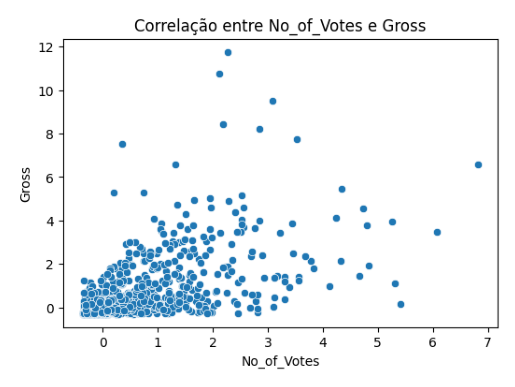

In [311]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

column_name = 'No_of_Votes'

file_path = map_corr_plots[column_name]

plt.axis('off')
img = mpimg.imread(file_path)

plt.imshow(img)
plt.show()

O gráfico sugere uma alta correlação positiva entre o número de votos e o faturamento. A dispersão dos pontos começa em valores mais baixos e se inclina para valores mais altos, formando uma linha ascendente. Isso indica que filmes com alto faturamento tendem a receber um número maior de votos. Naturalmente, o público de filmes de sucesso é mais engajado nas avaliações, gerando a dispersão observada. Portanto, é possível concluir que um alto número de votos geralmente indica um bom faturamento no contexto geral.

#### Ano de Lançamento e Faturamento de um filme

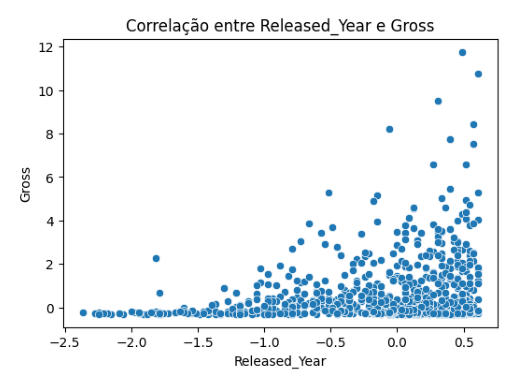

In [312]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

column_name = 'Released_Year'

file_path = map_corr_plots[column_name]

plt.axis('off')
img = mpimg.imread(file_path)

plt.imshow(img)
plt.show()

A correlação nesse segmento é clara: filmes mais recentes tendem a ter um maior faturamento bruto. Para esta análise, consideramos um contexto onde a correção monetária não é aplicada, embora no mundo real isso seja essencial. O aumento do faturamento pode estar ligado a diversas questões sociais, como a democratização do acesso ao lazer e ao entretenimento, bem como a produções mais elaboradas que utilizam tecnologias avançadas, capturando a atenção do público. Esses fatores contribuem para o maior engajamento e, consequentemente, para um maior faturamento dos filmes mais recentes.

#### Tempo de Duração e Faturamento 

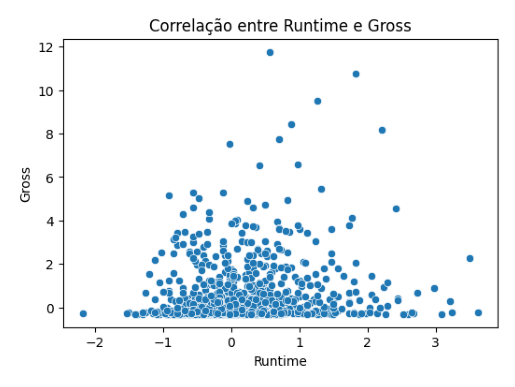

In [313]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

column_name = 'Runtime'

file_path = map_corr_plots[column_name]

plt.axis('off')
img = mpimg.imread(file_path)

plt.imshow(img)
plt.show()

A conexão dessas categorias demonstra que filmes de média a longa duração tendem a ser mais bem recebidos pelo público e, consequentemente, faturar mais. Esse fenômeno pode estar relacionado ao fato de que filmes nessa faixa de duração conseguem prender melhor a atenção do público e, ao mesmo tempo, desenvolver a história de forma coesa, evitando que ela fique incompleta ou excessivamente arrastada.

#### Nota IMDB e o Faturamento de um Filme

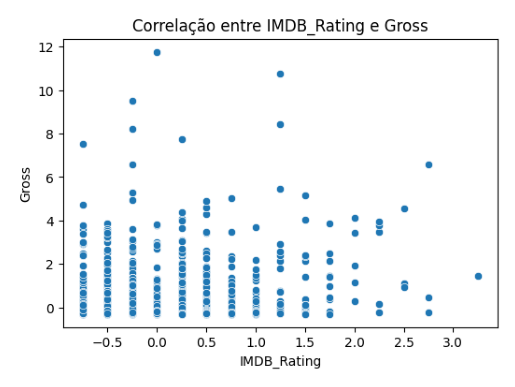

In [314]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


column_name = 'IMDB_Rating'

file_path = map_corr_plots[column_name]

plt.axis('off')
img = mpimg.imread(file_path)

plt.imshow(img)
plt.show()

A correlação neste gráfico é perceptível: filmes com classificações mais altas no IMDB tendem a ter um maior faturamento bruto. Para esta análise, estamos considerando um contexto onde a inflação e outros fatores econômicos não são aplicados, embora no mundo real isso seja essencial. O maior faturamento pode estar ligado a várias questões, como a qualidade da produção do filme, que é refletida na classificação do IMDB, bem como a popularidade e o marketing do filme. Filmes com classificações mais altas no IMDB geralmente são bem recebidos pelo público e pela crítica, o que pode levar a um maior engajamento do público e, consequentemente, a um maior faturamento. No entanto, também existem exceções, como pode ser visto pelos pontos dispersos no gráfico, indicando que um alto rating no IMDB não garante necessariamente um alto faturamento bruto.

#### Faturamento e o Gênero do Filme

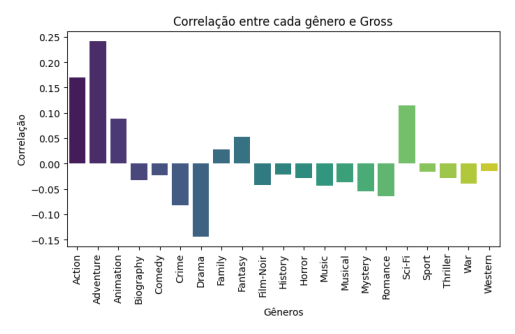

In [315]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

column_name = 'Genre'

file_path = map_corr_plots[column_name]

plt.axis('off')
img = mpimg.imread(file_path)

plt.imshow(img)
plt.show()

A correlação neste gráfico é variada, dependendo do gênero do filme. Alguns gêneros, como Animação, Aventura e Ação, mostram uma correlação positiva com o faturamento bruto, indicando que filmes desses gêneros tendem a ter um faturamento maior. Por outro lado, gêneros como Western e Crime mostram uma correlação negativa, sugerindo que filmes desses gêneros tendem a ter um faturamento menor.

No entanto, é importante notar que a correlação não implica causalidade. Embora haja uma correlação entre o gênero do filme e o faturamento bruto, isso não significa necessariamente que o gênero do filme causa um maior ou menor faturamento. Existem muitos outros fatores que podem influenciar o faturamento de um filme, como o orçamento de produção, o marketing, a popularidade dos atores, a época do lançamento, entre outros.

Além disso, embora alguns gêneros mostrem uma correlação negativa com o faturamento bruto, isso não significa que filmes desses gêneros não possam ser bem-sucedidos. Existem muitos exemplos de filmes de gêneros como Western e Crime que foram muito bem-sucedidos tanto em termos de crítica quanto de faturamento.


### Estudo focado nos Sucessos de Faturamento

#### Selecionar os Filmes de Suceso

Ao filtrar os filmes de maior sucesso podemos analizar quais as features estavam ligadas a essa alta no faturamento.

In [316]:
column = 'Gross'

def calculate_outliers_filter(data):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    filter = (data[column] <= Q3 + 1.5 * IQR)
    return filter

data_outliers = data_imputed[~calculate_outliers_filter(data_imputed)]
print(data_outliers.shape)

(116, 15)


#### Diretores e Atores Mais Frequentes em filmes de Sucesso

De um total de 73 diretores com filmes de sucesso
31.51% possuem mais de um filme de sucesso!


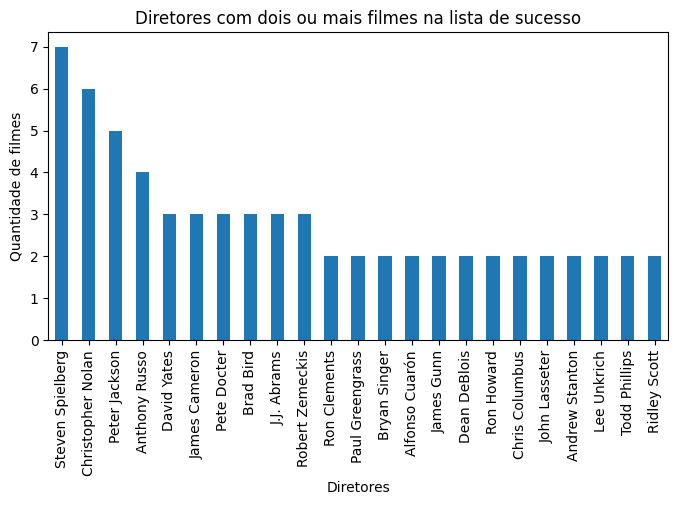

In [317]:
director_counts = data_outliers['Director'].value_counts()

top_directors = director_counts[:23]

print(f"De um total de {director_counts.size} diretores com filmes de sucesso")
print(f"{round(top_directors.size/director_counts.size*100, 2)}% possuem mais de um filme de sucesso!")
plt.figure(figsize=(8,4))
top_directors.plot(kind='bar')
plt.title('Diretores com dois ou mais filmes na lista de sucesso')
plt.xlabel('Diretores')
plt.ylabel('Quantidade de filmes')
plt.show()


**Steven Spielberg** é o diretor com o maior número de filmes de sucesso, seguido por **Christopher Nolan** e **Peter Jackson**. Isso sugere que esses diretores têm uma forte capacidade de produzir filmes que são bem recebidos pelo público e pela crítica. A presença de um diretor na lista pode indicar uma correlação entre a experiência do diretor e o sucesso do filme. Diretores que têm um histórico de filmes de sucesso podem ter mais chances de produzir filmes de sucesso no futuro.No entanto, é importante notar que o sucesso de um filme depende de muitos fatores, incluindo o roteiro, o elenco, o orçamento, a promoção e o mercado no momento do lançamento. Embora a direção seja um componente importante, ela é apenas uma parte do quebra-cabeça.Ainda assim, os dados podem ser úteis para investidores ou estúdios ao decidir quais projetos financiar. Um diretor com um histórico de filmes de sucesso pode ser visto como um investimento mais seguro.

De um total de 336 atores com filmes de sucesso
6.55% possuem mais de dois filme de sucesso!


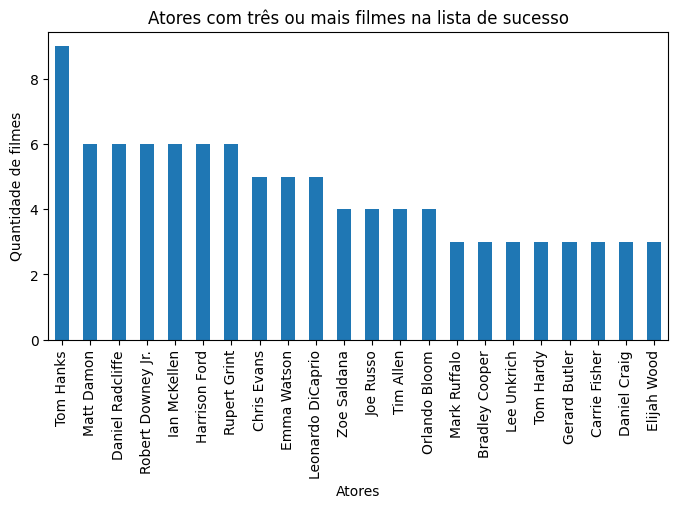

In [318]:
actors = pd.concat([data_outliers['Star1'], data_outliers['Star2'], data_outliers['Star3'], data_outliers['Star4']]).value_counts()

top_actors = actors[:22]

print(f"De um total de {actors.size} atores com filmes de sucesso")
print(f"{round(top_actors.size/actors.size*100, 2)}% possuem mais de dois filme de sucesso!")
plt.figure(figsize=(8,4))
top_actors.plot(kind='bar')
plt.title('Atores com três ou mais filmes na lista de sucesso')
plt.xlabel('Atores')
plt.ylabel('Quantidade de filmes')
plt.show()


De um total de 244 atores com filmes de sucesso, 9,02% têm mais de três filmes de sucesso. Isso indica que a indústria cinematográfica é diversificada, com muitos atores contribuindo como estrelas para filmes de sucesso. Alguns atores, como Tom Hanks, Harrison Ford, Ian McKellen, Robert Downey Jr., Rupert Grint, Daniel Radcliffe, Emma Watson, Leonardo DiCaprio, Matt Damon, Chris Evans, Joe Russo, Daniel Craig, Chris Pratt, Gerard Butler, Tim Allen, Lee Unkrich, Christian Bale, Carrie Fisher, Zoe Saldana, Bradley Cooper, Mark Hamill e Elijah Wood, têm um número significativo de filmes de sucesso, destacando-se na indústria.

Como o sucesso é medido pelo faturamento, os atores listados no gráfico provavelmente contribuíram para um alto faturamento nas bilheterias. Isso pode ser atribuído à sua popularidade, talento ou escolha de papéis, todos fatores que os tornam atores de destaque na indústria cinematográfica.

#### Gêneros mais Frequentes em filmes de Sucesso

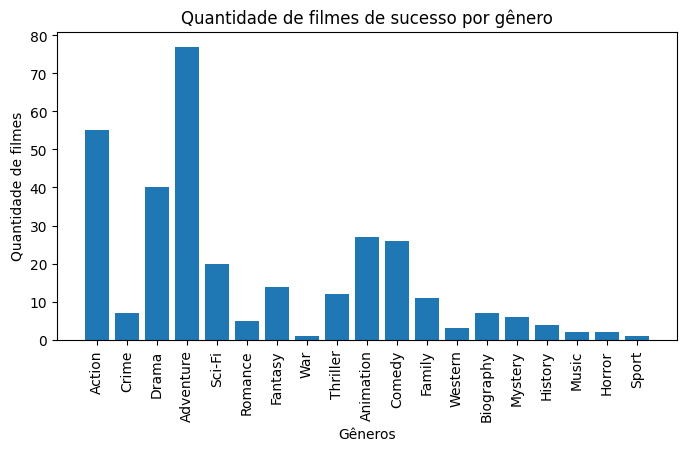

In [319]:
genres = []
for list_genre in data_outliers['Genre']:
    for genre in list_genre:
        if genre not in genres:
            genres.append(genre)

count_movies_genre = {}
for genre in genres:
    count_movies_genre[genre] = len(data_outliers[data_outliers['Genre'].apply(lambda x: genre in x)])

plt.figure(figsize=(8,4))
plt.bar(count_movies_genre.keys(), count_movies_genre.values())
plt.title('Quantidade de filmes de sucesso por gênero')
plt.xlabel('Gêneros')
plt.ylabel('Quantidade de filmes')
plt.xticks(rotation=90)
plt.show()


Filmes de aventura e ação geram maior faturamento bruto porque conseguem atingir um público mais amplo. Esses gêneros, com suas cenas emocionantes e enredos dinâmicos, atraem diversas faixas etárias e demográficas, garantindo um apelo universal que se traduz em altas bilheterias.

Da mesma forma, filmes de animação e comédia são considerados universais. A animação, com suas histórias envolventes e visuais cativantes, conquista tanto crianças quanto adultos. As comédias, com seu humor variado, conseguem atrair uma audiência global, resultando em um grande faturamento.

O gênero drama deve ser analisado com cautela. Por ser uma feature multilabel, o drama, por si só, não traz muitos insights isoladamente. Muitas vezes, os dramas são combinados com outros gêneros para alcançar um impacto maior e atrair um público mais diversificado.

A ficção científica também tem um impacto significativo no faturamento. Esse gênero se destaca porque explora temas inovadores e futuristas, muitas vezes acompanhados de efeitos visuais impressionantes e enredos complexos. A ficção científica não apenas cativa os fãs de tecnologia e inovação, mas também oferece uma escapada fascinante da realidade, o que contribui para seu sucesso nas bilheterias.

#### Classificação Indicativa em filmes de Sucesso

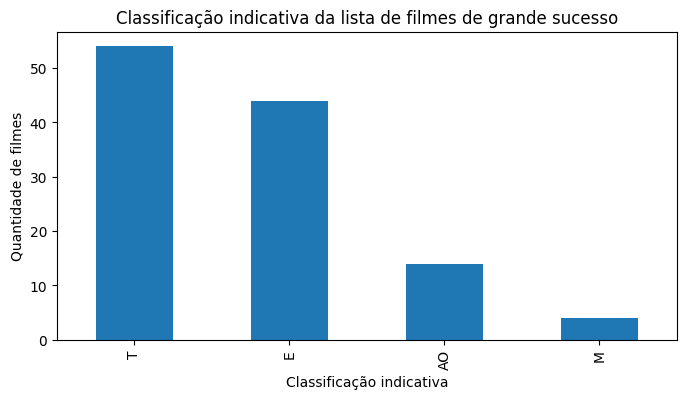

In [320]:
certificate_counts = data_outliers['Certificate'].value_counts()

plt.figure(figsize=(8,4))
certificate_counts.plot(kind='bar')
plt.title('Classificação indicativa da lista de filmes de grande sucesso')
plt.xlabel('Classificação indicativa')
plt.ylabel('Quantidade de filmes')
plt.show()

A maior quantidade de filmes na lista de sucesso pertence à classificação "T", que indica que o filme é adequado para crianças de 13 anos ou mais. Isso pode ser devido ao fato de que filmes destinados a esse grupo etário muitas vezes incluem animações e filmes de aventura que são populares entre o público. 

A segunda maior quantidade de filmes bem-sucedidos pertence à classificação "E", que geralmente indica que o filme é adequado para todas as idades. Isso sugere que filmes que são acessíveis a um público mais amplo tendem a ter mais sucesso, possivelmente devido a uma base de público maior.

As classificações "AO" e "M" têm uma quantidade significativamente menor de filmes na lista de sucesso. Isso pode ser devido a vários fatores, como restrições de público devido à classificação etária, ou esses filmes podem não ser tão universalmente atraentes quanto os filmes classificados como "T" ou "E".

# Modelagem Preditiva da Avaliação no IMDb

Para prever a nota do IMDb a partir dos dados, estamos lidando com um problema de **regressão**, pois a nota do IMDb é uma variável contínua. Existem algumas etapas que devem ser seguidas para garantir a melhor execução do problema: a **Seleção de Variáveis** que poderiam ser úteis para prever a nota do IMDb. A metodologia utilizada foi estudada anteriormente na análise exploratória, onde foi explorada a correlação da nota do IMDb com as demais variáveis para aferir o melhor resultado. As features selecionadas foram salvas em um dicionário e utilizadas na modelagem preditiva. A **Transformação de Variáveis** pode ser necessária antes de serem usadas em um modelo de regressão. Por exemplo, 'Genre', uma variável categórica, foi transformada em variáveis dummy. Além disso, se a distribuição de 'Gross' e 'No_of_Votes' era muito distorcida, foi aplicada uma transformação para normalizar a distribuição. Os **Modelos de Regressão** foram escolhidos considerando a presença de outliers, a distribuição e as características das features. As **Medidas de Performance** utilizadas para avaliar o modelo foram o erro quadrático médio (MSE) e o coeficiente de determinação (R²). O MSE mede a média dos erros quadrados das previsões, dando uma ideia de quão longe as previsões estão dos valores reais. O R² mede a proporção da variância na nota do IMDb que é explicável pelas variáveis independentes. O MSE é mais sensível a grandes erros porque eleva os erros ao quadrado, enquanto o R² pode ser mais interpretável porque fornece a proporção da variância explicada pelo modelo.

Os modelos aplicados foram:

1. **Regressão Linear**: Este modelo foi aplicado por ser simples e interpretável. Ele funciona ajustando uma linha reta aos dados, minimizando a soma dos quadrados das diferenças entre os valores observados e os valores previstos. No entanto, a regressão linear se limita a esperar relações lineares entre as variáveis, o que pode não ser o caso, dada a distribuição apresentada em alguns casos de correlação mostrados anteriormente.

2. **Regressão Ridge e Lasso**: Ambos são métodos de regularização que ajudam a lidar com a multicolinearidade nos dados. A Regressão Ridge adiciona uma penalidade ao tamanho dos coeficientes dos regressões, reduzindo a influência das variáveis menos importantes. A Regressão Lasso, além de reduzir a influência das variáveis menos importantes, pode eliminar completamente algumas variáveis, tornando o modelo mais interpretável. Essas técnicas são úteis, especialmente quando existe uma alta correlação entre as variáveis do IMDb, Número de Votos e Metascore, como foi testado anteriormente.

3. **Árvores de Decisão e Random Forest**: Estes modelos podem capturar relações não lineares e interações complexas entre variáveis. Árvores de Decisão funcionam dividindo repetidamente o espaço dos dados em subconjuntos mais simples, baseando-se em variáveis preditoras que resultam na maior redução de impureza. Random Forest é um conjunto de Árvores de Decisão, onde múltiplas árvores são treinadas com diferentes subconjuntos dos dados e suas previsões são combinadas, resultando em um modelo mais robusto e menos propenso a overfitting. Eles foram selecionados para o problema porque podem lidar com a complexidade dos dados e melhorar a precisão das previsões. No entanto, podem ser menos interpretáveis.

4. **Máquinas de Vetores de Suporte (SVM)**: Este modelo pode capturar relações complexas nos dados. Ele funciona mapeando os dados para um espaço de maior dimensão, onde um hiperplano pode ser utilizado para separar as diferentes classes. No contexto de regressão, a SVM tenta encontrar um hiperplano que tenha a maior margem possível para prever os valores contínuos. Foi selecionado para o estudo porque pode lidar com complexidades e não linearidades nos dados, mas pode ser computacionalmente intensivo e menos interpretável.

Esses modelos foram escolhidos e aplicados para capturar diferentes aspectos dos dados e garantir que as previsões da nota do IMDb sejam o mais robustas possível.

### Seleção de Features

In [299]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

imdb_rating = data_imputed['IMDB_Rating']

df = pd.get_dummies(data_imputed.drop(columns=['Overview', 'IMDB_Rating']), columns=['Series_Title','Director', 'Star1', 'Star2', 'Star3', 'Star4', 'Certificate'])
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df = df.explode('Genre')

df['IMDB_Rating'] = imdb_rating

df = pd.get_dummies(df, columns=['Genre'])

features_to_keep = ['Genre_Adventure', 'Genre_Crime', 'Genre_Film-Noir', 'Genre_Mystery', 'Genre_Sci-Fi', 'Genre_War', 'Genre_Western', 'Gross', 'Meta_score', 'Runtime', 'No_of_Votes', 'IMDB_Rating']
df = df[features_to_keep]

X_train, X_test, y_train, y_test = train_test_split(df.drop('IMDB_Rating', axis=1), df['IMDB_Rating'], test_size=0.2, random_state=42)


### Aplicação e Avaliação dos Modelo

               Model       MSE        R2
0  Linear Regression  0.042460  0.346573
1              Ridge  0.042433  0.346987
2              Lasso  0.064997 -0.000251
3      Random Forest  0.005778  0.911078
4      Decision Tree  0.005531  0.914875
5                SVM  0.034701  0.465974


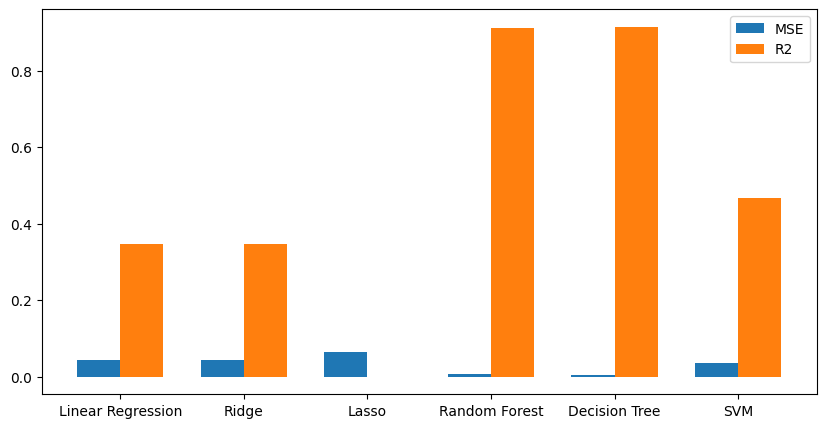

In [300]:
import pickle
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'SVM': SVR()
}

results = {'Model': [], 'MSE': [], 'R2': []}

os.makedirs("models", exist_ok=True)
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results['Model'].append(name)
    results['MSE'].append(mse)
    results['R2'].append(r2)
    with open(f'models/{name}_regression_model.pkl', 'wb') as f:
        pickle.dump(model, f)


results_df = pd.DataFrame(results)

print(results_df)

plt.figure(figsize=(10, 5))
x = np.arange(len(results['Model']))
width = 0.35
plt.bar(x - width/2, results['MSE'], width, label='MSE')
plt.bar(x + width/2, results['R2'], width, label='R2')
plt.xticks(ticks=x, labels=results['Model'], rotation=0)
plt.legend()
plt.show()


O gráfico mostra que a Floresta Aleatória tem o menor MSE e a maior pontuação R2 entre todos os modelos apresentados, indicando que tem o melhor desempenho nesta comparação. Por outro lado, o SVM tem um MSE alto e uma pontuação R2 baixa, sugerindo que tem um desempenho ruim em relação aos outros modelos para este conjunto de dados ou problema específico. Esta visualização é interessante, pois compara de forma sucinta o desempenho do modelo, permitindo uma rápida avaliação de qual modelo pode ser mais adequado para uma determinada tarefa ou conjunto de dados.
Os modelos de Floresta Aleatória (Random Forest) e Árvore de Decisão (Decision Tree) estão apresentando melhores resultados do que SVM, Lasso, Ridge e Regressão Linear neste conjunto de dados específico, conforme indicado pelas métricas de Erro Quadrático Médio (MSE) e R-quadrado (R²) no gráfico. Isso pode ser atribuído a várias razões. Primeiro, a **complexidade do modelo**: tanto a Floresta Aleatória quanto a Árvore de Decisão são capazes de capturar relações não lineares e interações complexas entre as variáveis, o que é particularmente útil quando tais relações estão presentes nos dados. Segundo, **overfitting e underfitting**: enquanto modelos simples como Regressão Linear, Ridge e Lasso podem sofrer de underfitting em cenários complexos, e modelos como SVM podem sofrer de overfitting com muitos recursos e poucos dados, a Floresta Aleatória e a Árvore de Decisão possuem mecanismos integrados para mitigar o overfitting, como a poda de árvores e a amostragem de bootstrap.

# Projeção de Avaliação Cinematográfica: Um Estudo de Caso

Para essa projeção de avaliação foi utilizado o algoritmo que obteve o melhor desempenho no estudo de caso executado, Random Forest obteve a menor nota de erro quadratico médi (MSE) e consequentemente tende a errar menos em sua previsão dado o caso atual. Além disso, obteve o maior valor de valor de coeficiente de determinação, que indica que a variancia do modelofoi ais Para essa projeção de avaliação, utilizamos o algoritmo que obteve o melhor desempenho no estudo de caso: o Random Forest. Este algoritmo apresentou a menor nota de erro quadrático médio (MSE), indicando menor tendência de erro em suas previsões, e obteve o maior valor do coeficiente de determinação (R²), demonstrando que explica a maior parte da variância nos dados. Além disso, o Random Forest é robusto a outliers, fornece estimativas da importância das features e tem uma boa capacidade de generalização, evitando overfitting e mantendo um bom desempenho em novos dados. Esses fatores tornam o Random Forest a melhor escolha para nossa análise, garantindo previsões mais precisas.

In [301]:
estimator = models['Random Forest']
new_movie = {
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': 1994,
    'Certificate': 'A',
    'Runtime': 142,
    'Genre': ['Drama'],
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': 28341469.0
}

new_movie_df = pd.DataFrame([new_movie])

new_movie_df = pd.get_dummies(new_movie_df, columns=['Series_Title','Director', 'Star1', 'Star2', 'Star3', 'Star4', 'Certificate'])
new_movie_df[numeric_cols] = scaler.transform(new_movie_df[numeric_cols])
new_movie_df = new_movie_df.explode('Genre')
new_movie_df = pd.get_dummies(new_movie_df, columns=['Genre'])

missing_cols = set(features_to_keep) - set(new_movie_df.columns)
for c in missing_cols:
    new_movie_df[c] = 0

new_movie_df = new_movie_df[features_to_keep]

predicted_rating = estimator.predict(new_movie_df.drop('IMDB_Rating', axis=1))
print(f"The predicted IMDB rating for 'The Shawshank Redemption' is {round(predicted_rating[0],2)}")


The predicted IMDB rating for 'The Shawshank Redemption' is 8.81
